**16 Nov 2021** 
<br><br>

Goal: Which days are really sensitive to HTG? Is there something consistent about that?

In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

# Analysis
# import os
import time
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats

# Import Ngl with pyn_env active 
# import Ngl

## Need to use metPy conda env
# import metpy.calc as mpc
# from metpy.units import units

import warnings
warnings.filterwarnings('ignore')



## Read in data

In [2]:
start_time = time.time()

saveDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/FinalOption/ProcessedFiles/'

HMGcamDS_localReal        = pickle.load( open( saveDir+"HMGcamDS_localReal.p", "rb" ) )
HTGcamDS_localReal        = pickle.load( open( saveDir+"HTGcamDS_localReal.p", "rb" ) )
HTGcamDS_localReal10      = pickle.load( open( saveDir+"HTGcamDS_localReal10.p", "rb" ) )

HMGclmDS_localReal        = pickle.load( open( saveDir+"HMGclmDS_localReal.p", "rb" ) )
HTGclmDS_localReal        = pickle.load( open( saveDir+"HTGclmDS_localReal.p", "rb" ) )
HTGclmDS_localReal10      = pickle.load( open( saveDir+"HTGclmDS_localReal10.p", "rb" ) )

HMGclmDS_localRealPatch   = pickle.load( open( saveDir+"HMGclmDS_localRealPatch.p", "rb" ) )
HTGclmDS_localRealPatch   = pickle.load( open( saveDir+"HTGclmDS_localRealPatch.p", "rb" ) )
HTGclmDS_localRealPatch10 = pickle.load( open( saveDir+"HTGclmDS_localRealPatch10.p", "rb" ) )

print('Loaded all the real_sfc pickle files')

HMGcamDS_localArt        = pickle.load( open( saveDir+"HMGcamDS_localArt.p", "rb" ) )
HTGcamDS_localArt        = pickle.load( open( saveDir+"HTGcamDS_localArt.p", "rb" ) )
HTGcamDS_localArt5       = pickle.load( open( saveDir+"HTGcamDS_localArt5.p", "rb" ) )
HTGcamDS_localArt25      = pickle.load( open( saveDir+"HTGcamDS_localArt25.p", "rb" ) )

HMGclmDS_localArt        = pickle.load( open( saveDir+"HMGclmDS_localArt.p", "rb" ) )
HTGclmDS_localArt        = pickle.load( open( saveDir+"HTGclmDS_localArt.p", "rb" ) )
HTGclmDS_localArt5       = pickle.load( open( saveDir+"HTGclmDS_localArt5.p", "rb" ) )
HTGclmDS_localArt25      = pickle.load( open( saveDir+"HTGclmDS_localArt25.p", "rb" ) )

HMGclmDS_localArtPatch   = pickle.load( open( saveDir+"HMGclmDS_localArtPatch.p", "rb" ) )
HTGclmDS_localArtPatch   = pickle.load( open( saveDir+"HTGclmDS_localArtPatch.p", "rb" ) )

print('Loaded all the artificial_sfc pickle files')

print('Total elapsed time (sec): ', time.time()-start_time)


Loaded all the real_sfc pickle files
Loaded all the artificial_sfc pickle files
Total elapsed time (sec):  27.98345398902893


In [3]:
## Large-scale forcing data:
nateForcingFileHTG = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-htg.nc'
nateDS_HTG = xr.open_dataset(nateForcingFileHTG, decode_times='True')

nateForcingFileHMG = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-hmg.nc'
nateDS_HMG = xr.open_dataset(nateForcingFileHMG, decode_times='True')

## Convert to local time too 
nateDS_local       = nateDS_HTG.copy(deep=True)

# Confirmed that all the times are identical, so using the same local time arrays
localTimes = nateDS_local['time'].values - np.timedelta64(5,'h')

# Replace time dimension with local time
nateDS_local = nateDS_local.assign_coords({"time": localTimes})

# Add month_day index
month_day_idx                         = pd.MultiIndex.from_arrays([nateDS_local['time.year'].values,
                                                                nateDS_local['time.month'].values, 
                                                                nateDS_local['time.day'].values])
nateDS_local.coords['year_month_day'] = ('time', month_day_idx)

# # Now sum over the day to get total amount of rainfall
# nateDS_localDailySum = nateDS_local.groupby('year_month_day').sum()


**Add month-day index**

In [4]:
# Add month_day index to arrays
month_day_idx                      = pd.MultiIndex.from_arrays([HMGcamDS_localReal['time.year'].values,
                                                                HMGcamDS_localReal['time.month'].values, 
                                                                HMGcamDS_localReal['time.day'].values])



HMGcamDS_localReal.coords['year_month_day']      = ('time', month_day_idx)
HMGclmDS_localReal.coords['year_month_day']      = ('time', month_day_idx)
HMGclmDS_localRealPatch.coords['year_month_day'] = ('time', month_day_idx)

HTGcamDS_localReal.coords['year_month_day']      = ('time', month_day_idx)
HTGclmDS_localReal.coords['year_month_day']      = ('time', month_day_idx)
HTGclmDS_localRealPatch.coords['year_month_day'] = ('time', month_day_idx)

HTGcamDS_localReal10.coords['year_month_day']      = ('time', month_day_idx)
HTGclmDS_localReal10.coords['year_month_day']      = ('time', month_day_idx)
HTGclmDS_localRealPatch10.coords['year_month_day'] = ('time', month_day_idx)


HMGcamDS_localArt.coords['year_month_day']      = ('time', month_day_idx)
HMGclmDS_localArt.coords['year_month_day']      = ('time', month_day_idx)
HMGclmDS_localArtPatch.coords['year_month_day'] = ('time', month_day_idx)

HTGcamDS_localArt.coords['year_month_day']      = ('time', month_day_idx)
HTGclmDS_localArt.coords['year_month_day']      = ('time', month_day_idx)
HTGclmDS_localArtPatch.coords['year_month_day'] = ('time', month_day_idx)

HTGcamDS_localArt5.coords['year_month_day']      = ('time', month_day_idx)
HTGclmDS_localArt5.coords['year_month_day']      = ('time', month_day_idx)

HTGcamDS_localArt25.coords['year_month_day']      = ('time', month_day_idx)
HTGclmDS_localArt25.coords['year_month_day']      = ('time', month_day_idx)


**Combine everything into one array and add in some other helpful variables**

In [5]:
## Belated realization that the heights computed are above *sea level* not above ground level. 
#    Need to subtract elevation. 
nateFile = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-hmg.bdate.nc'
nateDS = xr.open_dataset(nateFile, decode_times=True)
elevation = nateDS.alt.values

HMGcamDS_localReal['PBLdepth']   = HMGcamDS_localReal['PBLdepth']  - elevation[0][0] 
HTGcamDS_localReal['PBLdepth']   = HTGcamDS_localReal['PBLdepth']  - elevation[0][0] 
HTGcamDS_localReal10['PBLdepth'] = HTGcamDS_localReal10['PBLdepth']  - elevation[0][0] 

HMGcamDS_localArt['PBLdepth']    = HMGcamDS_localArt['PBLdepth']  - elevation[0][0] 
HTGcamDS_localArt['PBLdepth']    = HTGcamDS_localArt['PBLdepth']  - elevation[0][0] 
HTGcamDS_localArt5['PBLdepth']   = HTGcamDS_localArt5['PBLdepth']  - elevation[0][0] 
HTGcamDS_localArt25['PBLdepth']  = HTGcamDS_localArt25['PBLdepth']  - elevation[0][0] 


In [6]:
## Change some of how things are organized for optimizing performance: 
#  One giant dataset for all the different cases per surface definition 

realSfc_caseNames = np.asarray(['HMG','HTG','HTG10']).astype(str)
realSfc_allCases  = xr.concat([HMGcamDS_localReal,
                               HTGcamDS_localReal,
                               HTGcamDS_localReal10], "case")
realSfc_allCases = realSfc_allCases.assign_coords({"case": realSfc_caseNames})


artSfc_caseNames = np.asarray(['HMG','HTG']).astype(str)
artSfc_allCases  = xr.concat([HMGcamDS_localArt,
                              HTGcamDS_localArt], "case")
artSfc_allCases  = artSfc_allCases.assign_coords({"case": artSfc_caseNames})


# These runs have some different variable set ups than the one above so keep them separate for now 
artSfcMult_caseNames = np.asarray(['HTG5','HTG25']).astype(str)
artSfcMult_allCases  = xr.concat([HTGcamDS_localArt5,
                                  HTGcamDS_localArt25], "case")
artSfcMult_allCases  = artSfcMult_allCases.assign_coords({"case": artSfcMult_caseNames})


In [7]:
# Test method to get *all* of the artificial surface cases into a single data array 
list1 = set(artSfc_allCases.keys())
list2 = set(artSfcMult_allCases.keys())
sameVars = list(list1 & list2)

artSfc_all = xr.concat( [artSfc_allCases[sameVars], artSfcMult_allCases[sameVars]], 
                        "case")


In [87]:
## Change some of how things are organized for optimizing performance: 
#  One giant dataset for all the different cases per surface definition 

list1 = set(HMGclmDS_localReal.keys())
list2 = set(HTGclmDS_localReal10.keys())
sameVarsCLM = list(list1 & list2)

realSfc_caseNames   = np.asarray(['HMG','HTG','HTG10']).astype(str)
realSfcCLM_allCases = xr.concat([HMGclmDS_localReal[sameVarsCLM],
                                 HTGclmDS_localReal[sameVarsCLM],
                                 HTGclmDS_localReal10[sameVarsCLM] ], "case")
realSfcCLM_allCases = realSfcCLM_allCases.assign_coords({"case": realSfc_caseNames})



list1 = set(HMGclmDS_localArt.keys())
list2 = set(HTGclmDS_localArt5.keys())
sameVarsCLM = list(list1 & list2)

artSfc_caseNames    = np.asarray(['HMG','HTG','HTG5','HTG25']).astype(str)
artSfcCLM_all       = xr.concat([HMGclmDS_localArt[sameVarsCLM],
                                 HTGclmDS_localArt[sameVarsCLM],
                                 HTGclmDS_localArt5[sameVarsCLM], 
                                 HTGclmDS_localArt25[sameVarsCLM] ], "case")
artSfcCLM_all       = artSfcCLM_all.assign_coords({"case": artSfc_caseNames})


# # These runs have some different variable set ups than the one above so keep them separate for now 
# artSfcMult_caseNames = np.asarray(['HTG5','HTG25']).astype(str)
# artSfcMult_allCases  = xr.concat([HTGcamDS_localArt5,
#                                   HTGcamDS_localArt25], "case")
# artSfcMult_allCases  = artSfcMult_allCases.assign_coords({"case": artSfcMult_caseNames})


In [8]:
del HMGcamDS_localReal
del HTGcamDS_localReal
del HTGcamDS_localReal10

del HMGcamDS_localArt
del HTGcamDS_localArt
del HTGcamDS_localArt5 
del HTGcamDS_localArt25

del artSfc_allCases
del artSfcMult_allCases

In [9]:
## Add in TKE 

realSfc_allCases['TKE']  = (('case','time','ilev','lat,','lon'),
                   0.5*(realSfc_allCases['UP2_CLUBB']+realSfc_allCases['VP2_CLUBB']+realSfc_allCases['WP2_CLUBB']))  
                              
                              
artSfc_all['TKE']  = (('case','time','ilev','lat,','lon'),
                   0.5*(artSfc_all['UP2_CLUBB']+artSfc_all['VP2_CLUBB']+artSfc_all['WP2_CLUBB'])) 




realSfc_allCases['TKE'].attrs['units']   = 'm2/s2'
artSfc_all['TKE'].attrs['units'] = 'm2/s2'


realSfc_allCases['TKE'].attrs['long_name']   = 'Turbulent Kinetic Energy'
artSfc_all['TKE'].attrs['long_name'] = 'Turbulent Kinetic Energy'



In [10]:
realSfc_allCases['WindMagnitude']  = (('case','time','lev','lat,','lon'),
                                np.sqrt((realSfc_allCases.U.values**2.0) + (realSfc_allCases.V.values**2.0)) )

artSfc_all['WindMagnitude']  = (('case','time','lev','lat,','lon'),
                                np.sqrt((artSfc_all.U.values**2.0) + (artSfc_all.V.values**2.0)) )

realSfc_allCases['WindMagnitude'].attrs['units']  = 'm/s'
artSfc_all['WindMagnitude'].attrs['units'] = 'm/s'


realSfc_allCases['WindMagnitude'].attrs['long_name']   = 'Wind speed'
artSfc_all['WindMagnitude'].attrs['long_name']   = 'Wind speed'



In [11]:
## Add in EF  

realSfc_allCases['EF']  = ( ('case','time','lat,','lon'),
                   (realSfc_allCases['LHFLX']/(realSfc_allCases['LHFLX']+realSfc_allCases['SHFLX'])) )
                              
                              
artSfc_all['EF']  = (('case','time','lat,','lon'),
                   (artSfc_all['LHFLX']/(artSfc_all['LHFLX']+artSfc_all['SHFLX'])) )




realSfc_allCases['EF'].attrs['units']   = '-'
artSfc_all['EF'].attrs['units'] = '-'


realSfc_allCases['EF'].attrs['long_name']   = 'Evaporative Fraction'
artSfc_all['EF'].attrs['long_name'] = 'Evaporative Fraction'



In [12]:
## Add in Bowen Ratio  

realSfc_allCases['BowenRatio']  = ( ('case','time','lat,','lon'),
                   (realSfc_allCases['SHFLX']/(realSfc_allCases['LHFLX'])) )
                              
                              
artSfc_all['BowenRatio']  = (('case','time','lat,','lon'),
                   (artSfc_all['SHFLX']/(artSfc_all['LHFLX'])) )




realSfc_allCases['BowenRatio'].attrs['units']   = '-'
artSfc_all['BowenRatio'].attrs['units'] = '-'


realSfc_allCases['BowenRatio'].attrs['long_name']   = 'Bowen Ratio'
artSfc_all['BowenRatio'].attrs['long_name'] = 'Bowen Ratio'



## What's the response we're interested in...? 

We could try a few: <br>
* 2m Temperature 
* 2m Humidity
* PBL depth (however measured) 
* Cloud amount at some level 
* TKE 
* *Are* there any days where teh surface fluxes are really sensitive? 
* Daily rainfall? 

In [201]:
varSel  = 'SHFLX'

In [202]:
if len(np.shape(realSfc_allCases[varSel]))==5:
    if np.shape(realSfc_allCases[varSel])[2]==65:
        real_var = realSfc_allCases[varSel].isel(ilev=-1)
        art_var  = artSfc_all[varSel].isel(ilev=-1)
    elif np.shape(realSfc_allCases[varSel])[2]==64:
        real_var = realSfc_allCases[varSel].isel(lev=-1)
        art_var  = artSfc_all[varSel].isel(lev=-1)
        
else:
    real_var = realSfc_allCases[varSel]
    art_var  = artSfc_all[varSel]

## Let's say we care about daily mean... from maybe 7a to 6p 
startHr = 7
endHr   = 18

# Select those hours
iHours_real = np.where( (real_var['time.hour']>=startHr) & (real_var['time.hour']<=endHr) )[0]
iHours_art  = np.where( (art_var['time.hour']>=startHr)  & (art_var['time.hour']<=endHr) )[0]

real_var_selTime = real_var.isel(time=iHours_real)
art_var_selTime  = art_var.isel(time=iHours_art)

# For each date, get the mean value over the selected time period 
real_var_dayMean = real_var_selTime.groupby('year_month_day').mean(dim='time')
art_var_dayMean  = art_var_selTime.groupby('year_month_day').mean(dim='time')


In [203]:
## Get list of dates in string form
strDates = []

for iDate in range(len(art_var_dayMean.year_month_day.values)):
    yr_sel  = art_var_dayMean.year_month_day_level_0[iDate]
    mon_sel = art_var_dayMean.year_month_day_level_1[iDate]
    day_sel = art_var_dayMean.year_month_day_level_2[iDate]
    
    strDates = np.append(strDates, datetime.date(yr_sel,mon_sel,day_sel))

    
# Get year delineation 
yrStart =[]

for iDate in range(len(strDates)-1):
    if strDates[iDate].year==(strDates[iDate+1].year)-1:
        
        yrStart = np.append(yrStart, iDate+1)


**What's the general change in distribution of that variable?**

In [204]:
dfReal = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({varSel: np.squeeze(real_var_dayMean.values[0,:]), 'case': 'HMG'}),
     pd.DataFrame.from_dict({varSel: np.squeeze(real_var_dayMean.values[1,:]), 'case': 'HTG'}),
     pd.DataFrame.from_dict({varSel: np.squeeze(real_var_dayMean.values[2,:]), 'case': 'HTG*10'}),
])

dfArt = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({varSel: np.squeeze(art_var_dayMean.values[0,:]), 'case': 'HMG'}),
     pd.DataFrame.from_dict({varSel: np.squeeze(art_var_dayMean.values[1,:]), 'case': 'HTG'}),
     pd.DataFrame.from_dict({varSel: np.squeeze(art_var_dayMean.values[2,:]), 'case': 'HTG*0.5'}),
     pd.DataFrame.from_dict({varSel: np.squeeze(art_var_dayMean.values[3,:]), 'case': 'HTG*0.25'}),
])

[None, None, None, None, None, None]

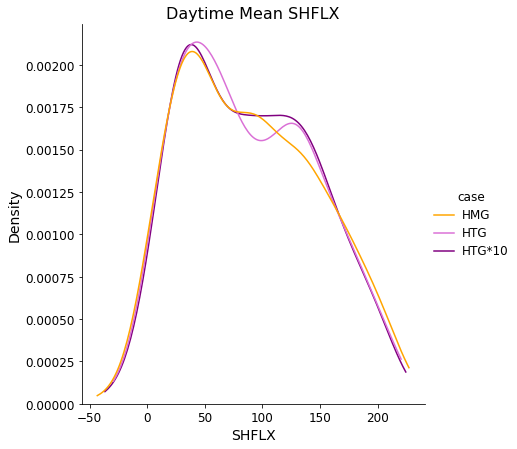

In [205]:
g = sns.displot(dfReal, x=varSel, hue='case', kind='kde', height=6, cut=0, palette=['orange','orchid','purple'])

g.ax.set_title("Daytime Mean "+varSel, fontsize=16 ) 
g.ax.set_xlabel(varSel,fontsize=14)
g.ax.set_ylabel('Density',fontsize=14)
g.ax.tick_params(axis='both', labelsize= 12)
plt.setp(g._legend.get_title(), fontsize=12)
plt.setp(g._legend.get_texts(), fontsize=12)

# g.ax.set_xscale('log')

# g.ax.axvline(110,color='k')
# g.ax.axvline(160,color='k')


[None, None, None, None, None, None, None, None]

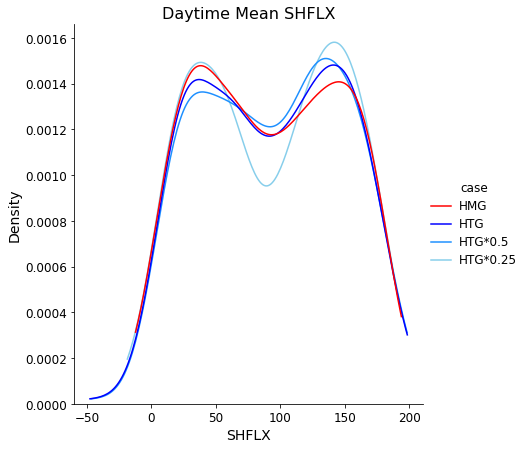

In [206]:
g = sns.displot(dfArt, x=varSel, hue='case', kind='kde' ,height=6, cut=0, palette=['r','b','dodgerblue','skyblue'])

g.ax.set_title("Daytime Mean "+varSel, fontsize=16 ) 
g.ax.set_xlabel(varSel,fontsize=14)
g.ax.set_ylabel('Density',fontsize=14)
g.ax.tick_params(axis='both', labelsize= 12)
plt.setp(g._legend.get_title(), fontsize=12)
plt.setp(g._legend.get_texts(), fontsize=12)

# g.ax.set_xscale('log')
# g.ax.axvline(20,color='k',linestyle='--')
# g.ax.axvline(60,color='k',linestyle='--')

# g.ax.axvline(110,color='k')
# g.ax.axvline(160,color='k')


In [207]:
# # Number of days with mean SHFLX within those bounds? 

# print('Number of days HMGreal: ', len(np.where( (real_var_dayMean[0,:,0,0]>=110)  & (real_var_dayMean[0,:,0,0]<=160) )[0] ))
# print('Number of days HTGreal: ', len(np.where( (real_var_dayMean[1,:,0,0]>=110)  & (real_var_dayMean[1,:,0,0]<=160) )[0] ))
# print('Number of days HTG*10:  ', len(np.where( (real_var_dayMean[2,:,0,0]>=110)  & (real_var_dayMean[2,:,0,0]<=160) )[0] ))

# print()
# print('Number of days HMGart:    ', len(np.where( (art_var_dayMean[0,:,0,0]>=110)  & (art_var_dayMean[0,:,0,0]<=160) )[0] ))
# print('Number of days HTGrart:   ', len(np.where( (art_var_dayMean[1,:,0,0]>=110)  & (art_var_dayMean[1,:,0,0]<=160) )[0] ))
# print('Number of days HTG*0.5:   ', len(np.where( (art_var_dayMean[2,:,0,0]>=110)  & (art_var_dayMean[2,:,0,0]<=160) )[0] ))
# print('Number of days HTG*0.25:  ', len(np.where( (art_var_dayMean[3,:,0,0]>=110)  & (art_var_dayMean[3,:,0,0]<=160) )[0] ))



**Pick out where changes are large (positive and negative sides)**

In [208]:
## Now get the dates where the HTG case has a really different behavior than the HMG one... 
diff_realHTG   = np.squeeze(real_var_dayMean.values[1,:]) - np.squeeze(real_var_dayMean.values[0,:])
diff_realHTG10 = np.squeeze(real_var_dayMean.values[2,:]) - np.squeeze(real_var_dayMean.values[0,:])

diff_artHTG    = np.squeeze(art_var_dayMean.values[1,:] ) - np.squeeze(art_var_dayMean.values[0,:])
diff_artHTG5   = np.squeeze(art_var_dayMean.values[2,:] ) - np.squeeze(art_var_dayMean.values[0,:])
diff_artHTG25  = np.squeeze(art_var_dayMean.values[3,:] ) - np.squeeze(art_var_dayMean.values[0,:])



In [215]:
highPct = 85
lowPct  = 15

print('Real Surface:')
print('- - - - - - - - ')
print(highPct, 'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG, highPct))
print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG, lowPct))
print()
print(highPct,'th percentile difference (HTG10): %.3e'  % np.nanpercentile(diff_realHTG10, highPct))
print(lowPct,'th percentile difference (HTG10):  %.3e'  % np.nanpercentile(diff_realHTG10, lowPct))
print('\n\n')

print('Artificial Surface:')
print('- - - - - - - - - - - ')
print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_artHTG, highPct))
print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_artHTG, lowPct))
print()
print(highPct,'th percentile difference (HTG5): %.3e'  % np.nanpercentile(diff_artHTG5, highPct))
print(lowPct,'th percentile difference (HTG5):  %.3e'  % np.nanpercentile(diff_artHTG5, lowPct))
print()
print(highPct,'th percentile difference (HTG25): %.3e'  % np.nanpercentile(diff_artHTG25, highPct))
print(lowPct,'th percentile difference (HTG25):  %.3e'  % np.nanpercentile(diff_artHTG25, lowPct))


print()
print('Number of days in each category: ', len(np.where(diff_artHTG25>=np.nanpercentile(diff_artHTG25, highPct))[0]))

# Select the dates that fit into each category 



Real Surface:
- - - - - - - - 
85 th percentile difference (HTG): 1.409e+01
15 th percentile difference (HTG):  -1.226e+01

85 th percentile difference (HTG10): 1.349e+01
15 th percentile difference (HTG10):  -1.211e+01



Artificial Surface:
- - - - - - - - - - - 
85 th percentile difference (HTG): 1.339e+01
15 th percentile difference (HTG):  -1.638e+01

85 th percentile difference (HTG5): 1.452e+01
15 th percentile difference (HTG5):  -1.189e+01

85 th percentile difference (HTG25): 1.275e+01
15 th percentile difference (HTG25):  -1.396e+01

Number of days in each category:  53


In [216]:
iHigh_realHTG   = np.where(diff_realHTG   >= np.nanpercentile(diff_realHTG, highPct))[0]
iHigh_realHTG10 = np.where(diff_realHTG10 >= np.nanpercentile(diff_realHTG10, highPct))[0]
iHigh_artHTG    = np.where(diff_artHTG    >= np.nanpercentile(diff_artHTG, highPct))[0]
iHigh_artHTG5   = np.where(diff_artHTG5   >= np.nanpercentile(diff_artHTG5, highPct))[0]
iHigh_artHTG25  = np.where(diff_artHTG25  >= np.nanpercentile(diff_artHTG25, highPct))[0]


iLow_realHTG   = np.where(diff_realHTG   <= np.nanpercentile(diff_realHTG, lowPct))[0]
iLow_realHTG10 = np.where(diff_realHTG10 <= np.nanpercentile(diff_realHTG10, lowPct))[0]
iLow_artHTG    = np.where(diff_artHTG    <= np.nanpercentile(diff_artHTG, lowPct))[0]
iLow_artHTG5   = np.where(diff_artHTG5   <= np.nanpercentile(diff_artHTG5, lowPct))[0]
iLow_artHTG25  = np.where(diff_artHTG25  <= np.nanpercentile(diff_artHTG25, lowPct))[0]


In [217]:
# setHigh_HTGreal   = set( iHigh_realHTG )
# setHigh_HTG10real = set( iHigh_realHTG10 )

# setHigh_HTGart    = set( iHigh_artHTG )
# setHigh_HTG5art   = set( iHigh_artHTG5 )
# setHigh_HTG25art  = set( iHigh_artHTG25 )

# print('Num days consistent for high percentile in HTG_real cases: ', 
#       len(list(setHigh_HTGreal & setHigh_HTG10real)))
# print('Num days consistent for high percentile in HTG_art cases: ',
#       len(list(setHigh_HTGart & setHigh_HTG5art & setHigh_HTG25art)))
# print('Num days consistent across *all* HTG cases: ',
#      len(list(setHigh_HTGreal & setHigh_HTG10real & setHigh_HTGart & setHigh_HTG5art & setHigh_HTG25art)))

In [218]:
## Get indices of dates that are consistent...

listHigh_real = list(set( iHigh_realHTG ) &  set( iHigh_realHTG10 ) )
listLow_real  = list(set( iLow_realHTG )  &  set( iLow_realHTG10 ) )

listHigh_art  = list(set( iHigh_artHTG ) &  set( iHigh_artHTG5 ) &  set( iHigh_artHTG25 ) )
listLow_art   = list(set( iLow_artHTG )  &  set( iLow_artHTG5 )  &  set( iLow_artHTG25 ) )

print('Num days consistent for high percentile (real sfc): ', len(listHigh_real))
print('Num days consistent for low  percentile (real sfc): ', len(listLow_real))

print('Num days consistent for high percentile (art sfc): ', len(listHigh_art))
print('Num days consistent for low  percentile (art sfc): ', len(listLow_art))



Num days consistent for high percentile (real sfc):  25
Num days consistent for low  percentile (real sfc):  27
Num days consistent for high percentile (art sfc):  28
Num days consistent for low  percentile (art sfc):  20


In [219]:
allIndicies = np.arange(0,len(strDates))

restOfIndices_real = list(set(allIndicies) - set(listHigh_real) - set(listLow_real))
restOfIndices_art  = list(set(allIndicies) - set(listHigh_art)  - set(listLow_art))


In [214]:
# print('Dates with highPct changes over a real surface:')
# print(np.sort(strDates[listHigh_real]))

# print('\nDates with highPct changes over an artificial surface:')
# print(np.sort(strDates[listHigh_art]))


In [318]:
# print('Dates with lowPct changes over a real surface:')
# print(np.sort(strDates[listLow_real]))

# print('\nDates with lowPct changes over an artificial surface:')
# print(np.sort(strDates[listLow_art]))



In [220]:
diffArr = np.full([len(strDates), 5], np.nan)

diffArr[:,0] = diff_artHTG
diffArr[:,1] = diff_artHTG5
diffArr[:,2] = diff_artHTG25
diffArr[:,3] = diff_realHTG10
diffArr[:,4] = diff_realHTG


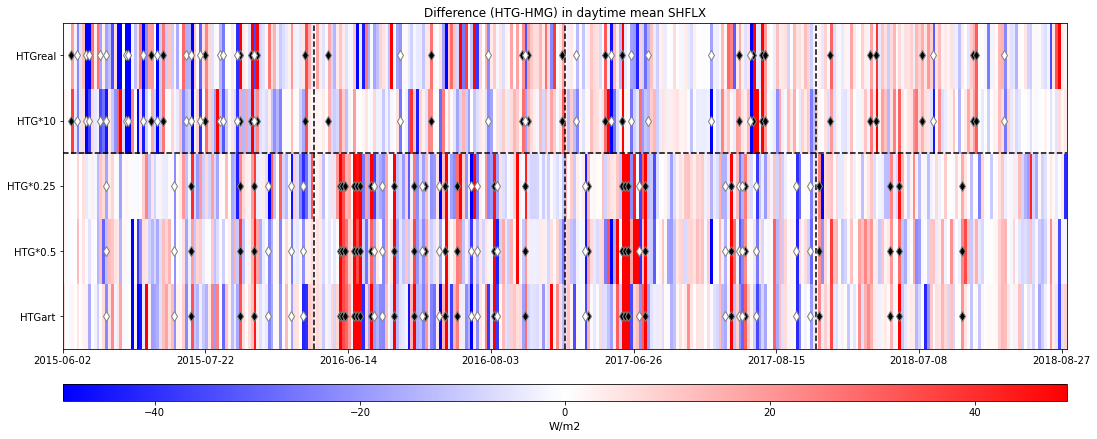

In [221]:
fig,axs = plt.subplots(1,1, figsize=(18,6))

cplot = axs.pcolor(np.transpose(diffArr), cmap='bwr', 
                       vmax = np.nanpercentile(np.abs(diffArr),95), vmin=-np.nanpercentile(np.abs(diffArr),95))

# Add labels
axs.set_title('Difference (HTG-HMG) in daytime mean '+varSel)


# Add colorbar
ax_position = axs.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.12, ax_position.width, 0.04])
cbar = plt.colorbar(cplot, orientation='horizontal',cax=cbar_ax)
if hasattr(realSfc_allCases[varSel], 'units'):
            cbar.set_label(realSfc_allCases[varSel].units,fontsize=11)

# Control tick labels
xTicks = axs.get_xticks()
dates_xticks = strDates[xTicks.astype(int)[:-1]]
axs.set_xticklabels(dates_xticks)

axs.set_yticks([0.5,1.5,2.5,3.5,4.5])
axs.set_yticklabels(['HTGart','HTG*0.5','HTG*0.25','HTG*10','HTGreal'])

## Add separating lines for ease of looking at these 
axs.axhline(3,color='k',linestyle='--')
for iYr in range(len(yrStart)):
    axs.axvline(yrStart[iYr], color='k',linestyle='--')

## Add indicators of consistent days 
for iPoint in range(len(listHigh_real)):
    axs.plot(listHigh_real[iPoint], 4.5,'d',color='k', markeredgecolor='grey', markersize=6.5)
    axs.plot(listHigh_real[iPoint], 3.5,'d',color='k', markeredgecolor='grey', markersize=6.5)
    
for iPoint in range(len(listHigh_art)):
    axs.plot(listHigh_art[iPoint], 2.5,'d',color='k', markeredgecolor='grey', markersize=6.5)
    axs.plot(listHigh_art[iPoint], 1.5,'d',color='k', markeredgecolor='grey', markersize=6.5)
    axs.plot(listHigh_art[iPoint], 0.5,'d',color='k', markeredgecolor='grey', markersize=6.5)
    
for iPoint in range(len(listLow_real)):
    axs.plot(listLow_real[iPoint], 4.5,'d',color='w', markeredgecolor='grey', markersize=6.5)
    axs.plot(listLow_real[iPoint], 3.5,'d',color='w', markeredgecolor='grey', markersize=6.5)
    
for iPoint in range(len(listLow_art)):
    axs.plot(listLow_art[iPoint], 2.5,'d',color='w', markeredgecolor='grey', markersize=6.5)
    axs.plot(listLow_art[iPoint], 1.5,'d',color='w', markeredgecolor='grey', markersize=6.5)
    axs.plot(listLow_art[iPoint], 0.5,'d',color='w', markeredgecolor='grey', markersize=6.5)    
    
    
plt.show()

Text(0, 0.5, 'HTGart0.25 - HMGart')

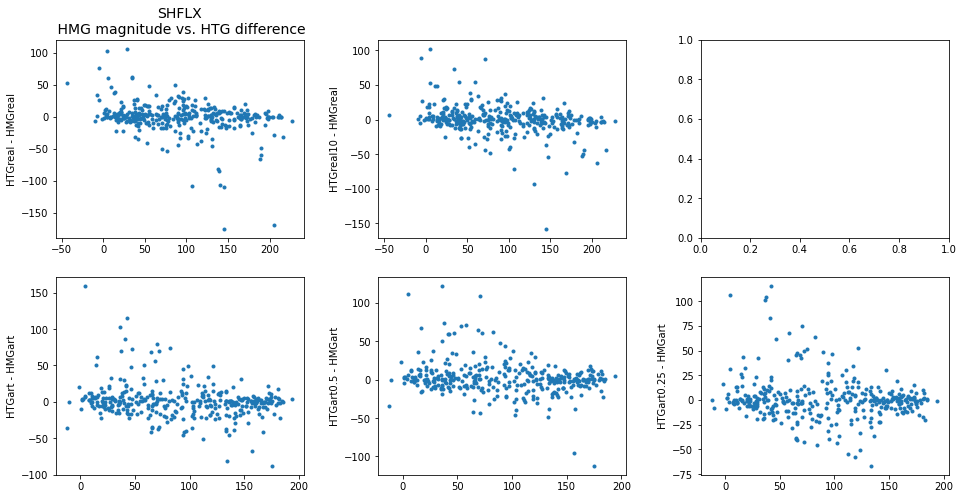

In [222]:
fig,axs = plt.subplots(2,3, figsize=(16,8))
axs     = axs.ravel()
fig.subplots_adjust(wspace=0.3)

axs[0].set_title(varSel+'\n HMG magnitude vs. HTG difference', fontsize=14)
axs[0].plot(np.squeeze(real_var_dayMean.values[0,:]), diff_realHTG, 'o', markersize=3)
axs[0].set_ylabel('HTGreal - HMGreal')

axs[1].plot(np.squeeze(real_var_dayMean.values[0,:]), diff_realHTG10, 'o', markersize=3)
axs[1].set_ylabel('HTGreal10 - HMGreal')

axs[3].plot(np.squeeze(art_var_dayMean.values[0,:]), diff_artHTG, 'o', markersize=3)
axs[3].set_ylabel('HTGart - HMGart')

axs[4].plot(np.squeeze(art_var_dayMean.values[0,:]), diff_artHTG5, 'o', markersize=3)
axs[4].set_ylabel('HTGart0.5 - HMGart')

axs[5].plot(np.squeeze(art_var_dayMean.values[0,:]), diff_artHTG25, 'o', markersize=3)
axs[5].set_ylabel('HTGart0.25 - HMGart')



**Match those days in full arrays**

In [223]:
'''
Find all the times in the full array (20m dt) that line up with the day classifications above. 
'''
def getTimes_basedOnDates(fullDS, matchDatesDS):
    iTimes = []
    
    for iTime in range(len(matchDatesDS.year_month_day.values)):
        iKeepTimes = np.where((fullDS['time.year'] ==matchDatesDS.year_month_day_level_0.values[iTime]) &
                              (fullDS['time.month']==matchDatesDS.year_month_day_level_1.values[iTime]) & 
                              (fullDS['time.day']  ==matchDatesDS.year_month_day_level_2.values[iTime]))[0]    
        iTimes = np.append(iTimes, iKeepTimes).astype(int)
    
    # Now select only those times in the local time array
    DS_dayClass = fullDS.isel(time=iTimes)
    
    return(DS_dayClass)

In [224]:
## Get full arrays that match low/high percentiles that are consistent across surface definition 
#    ( so one set for real surface cases and one for the artificial surface cases )

# Real surface 
highPct_realSfcHTG    = getTimes_basedOnDates(realSfc_allCases.isel(case=np.asarray([0,1])),     
                                              real_var_dayMean.isel(year_month_day=listHigh_real))

highPct_realSfcHTG10  = getTimes_basedOnDates(realSfc_allCases.isel(case=np.asarray([0,2])),     
                                                  real_var_dayMean.isel(year_month_day=listHigh_real))


lowPct_realSfcHTG     = getTimes_basedOnDates(realSfc_allCases.isel(case=np.asarray([0,1])),     
                                                  real_var_dayMean.isel(year_month_day=listLow_real))

lowPct_realSfcHTG10   = getTimes_basedOnDates(realSfc_allCases.isel(case=np.asarray([0,2])),     
                                                 real_var_dayMean.isel(year_month_day=listLow_real))
print('Done with real surface cases ')


# Artificial surface 
highPct_artSfcHTG     = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,1])),     
                                                 art_var_dayMean.isel(year_month_day=listHigh_art))

highPct_artSfcHTG5    = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,2])),     
                                                 art_var_dayMean.isel(year_month_day=listHigh_art))

highPct_artSfcHTG25   = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,3])),     
                                                 art_var_dayMean.isel(year_month_day=listHigh_art))


lowPct_artSfcHTG     = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,1])),     
                                                 art_var_dayMean.isel(year_month_day=listLow_art))

lowPct_artSfcHTG5    = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,2])),     
                                                 art_var_dayMean.isel(year_month_day=listLow_art))

lowPct_artSfcHTG25   = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,3])),     
                                                 art_var_dayMean.isel(year_month_day=listLow_art))

print('Done with artificial surface cases')


# Matching observational datasets 
highPct_realSfcHTG_obs = getTimes_basedOnDates(nateDS_local,     
                                                  real_var_dayMean.isel(year_month_day=listHigh_real))
highPct_realSfcHTG10_obs = getTimes_basedOnDates(nateDS_local,     
                                                  real_var_dayMean.isel(year_month_day=listHigh_real))
                                                  
lowPct_realSfcHTG_obs = getTimes_basedOnDates(nateDS_local,     
                                                  real_var_dayMean.isel(year_month_day=listLow_real))
lowPct_realSfcHTG10_obs = getTimes_basedOnDates(nateDS_local,     
                                                  real_var_dayMean.isel(year_month_day=listLow_real))


highPct_artSfcHTG_obs   = getTimes_basedOnDates(nateDS_local,     
                                                 art_var_dayMean.isel(year_month_day=listHigh_art))
highPct_artSfcHTG5_obs  = getTimes_basedOnDates(nateDS_local,     
                                                 art_var_dayMean.isel(year_month_day=listHigh_art))
highPct_artSfcHTG25_obs = getTimes_basedOnDates(nateDS_local,     
                                                 art_var_dayMean.isel(year_month_day=listHigh_art))

lowPct_artSfcHTG_obs   = getTimes_basedOnDates(nateDS_local,     
                                                 art_var_dayMean.isel(year_month_day=listLow_art))
lowPct_artSfcHTG5_obs  = getTimes_basedOnDates(nateDS_local,     
                                                 art_var_dayMean.isel(year_month_day=listLow_art))
lowPct_artSfcHTG25_obs = getTimes_basedOnDates(nateDS_local,     
                                                 art_var_dayMean.isel(year_month_day=listLow_art))

print('Done with obs cases')



Done with real surface cases 
Done with artificial surface cases
Done with obs cases


In [225]:
## Get arrays with other % of days that don't fall into the category of the extremes 
restOfDays_realSfc   = getTimes_basedOnDates(realSfc_allCases,     
                                             real_var_dayMean.isel(year_month_day=restOfIndices_real))

restOfDays_artSfc    = getTimes_basedOnDates(artSfc_all,     
                                             art_var_dayMean.isel(year_month_day=restOfIndices_art))


restOfDays_realSfc_obs   = getTimes_basedOnDates(nateDS_local,     
                                             real_var_dayMean.isel(year_month_day=restOfIndices_real))

restOfDays_artSfc_obs    = getTimes_basedOnDates(nateDS_local,     
                                             art_var_dayMean.isel(year_month_day=restOfIndices_art))


print('Done getting datasets with rest of the days')


Done getting datasets with rest of the days


In [226]:
## Get those days in CLM dataset too 

# Real surface 
highPct_realSfcCLM  = getTimes_basedOnDates(realSfcCLM_allCases,     
                                            real_var_dayMean.isel(year_month_day=listHigh_real))

lowPct_realSfcCLM   = getTimes_basedOnDates(realSfcCLM_allCases,     
                                            real_var_dayMean.isel(year_month_day=listLow_real))

# Artificial surface 
highPct_artSfcCLM  = getTimes_basedOnDates(artSfcCLM_all,     
                                            real_var_dayMean.isel(year_month_day=listHigh_art))

lowPct_artSfcCLM   = getTimes_basedOnDates(artSfcCLM_all,     
                                            real_var_dayMean.isel(year_month_day=listLow_art))


# Get rest of the days 
restOfDays_realSfcCLM   = getTimes_basedOnDates(realSfcCLM_allCases,     
                                                real_var_dayMean.isel(year_month_day=restOfIndices_real))

restOfDays_artSfcCLM    = getTimes_basedOnDates(artSfcCLM_all,     
                                               art_var_dayMean.isel(year_month_day=restOfIndices_art))

print('Done getting CLM datasets')

Done getting CLM datasets


In [167]:
# ## Get full arrays that match low/high percentiles in each case (art/real sfc, multipliers )

# # Real surface 
# highPct_realSfcHTG    = getTimes_basedOnDates(realSfc_allCases.isel(case=np.asarray([0,1])),     
#                                               real_var_dayMean.isel(year_month_day=iHigh_realHTG))

# highPct_realSfcHTG10  = getTimes_basedOnDates(realSfc_allCases.isel(case=np.asarray([0,2])),     
#                                                   real_var_dayMean.isel(year_month_day=iHigh_realHTG10))


# lowPct_realSfcHTG     = getTimes_basedOnDates(realSfc_allCases.isel(case=np.asarray([0,1])),     
#                                                   real_var_dayMean.isel(year_month_day=iLow_realHTG))

# lowPct_realSfcHTG10   = getTimes_basedOnDates(realSfc_allCases.isel(case=np.asarray([0,2])),     
#                                                  real_var_dayMean.isel(year_month_day=iLow_realHTG10))
# print('Done with real surface cases ')


# # Artificial surface 
# highPct_artSfcHTG     = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,1])),     
#                                                  art_var_dayMean.isel(year_month_day=iHigh_artHTG))

# highPct_artSfcHTG5    = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,2])),     
#                                                  art_var_dayMean.isel(year_month_day=iHigh_artHTG5))

# highPct_artSfcHTG25   = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,3])),     
#                                                  art_var_dayMean.isel(year_month_day=iHigh_artHTG25))


# lowPct_artSfcHTG     = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,1])),     
#                                                  art_var_dayMean.isel(year_month_day=iLow_artHTG))

# lowPct_artSfcHTG5    = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,2])),     
#                                                  art_var_dayMean.isel(year_month_day=iLow_artHTG5))

# lowPct_artSfcHTG25   = getTimes_basedOnDates(artSfc_all.isel(case=np.asarray([0,3])),     
#                                                  art_var_dayMean.isel(year_month_day=iLow_artHTG25))
# print('Done with artificial surface cases')


# # Matching observational datasets 
# highPct_realSfcHTG_obs = getTimes_basedOnDates(nateDS_local,     
#                                                   real_var_dayMean.isel(year_month_day=iHigh_realHTG))
# highPct_realSfcHTG10_obs = getTimes_basedOnDates(nateDS_local,     
#                                                   real_var_dayMean.isel(year_month_day=iHigh_realHTG10))
                                                  
# lowPct_realSfcHTG_obs = getTimes_basedOnDates(nateDS_local,     
#                                                   real_var_dayMean.isel(year_month_day=iLow_realHTG))
# lowPct_realSfcHTG10_obs = getTimes_basedOnDates(nateDS_local,     
#                                                   real_var_dayMean.isel(year_month_day=iLow_realHTG10))


# highPct_artSfcHTG_obs   = getTimes_basedOnDates(nateDS_local,     
#                                                  art_var_dayMean.isel(year_month_day=iHigh_artHTG))
# highPct_artSfcHTG5_obs  = getTimes_basedOnDates(nateDS_local,     
#                                                  art_var_dayMean.isel(year_month_day=iHigh_artHTG5))
# highPct_artSfcHTG25_obs = getTimes_basedOnDates(nateDS_local,     
#                                                  art_var_dayMean.isel(year_month_day=iHigh_artHTG25))

# lowPct_artSfcHTG_obs   = getTimes_basedOnDates(nateDS_local,     
#                                                  art_var_dayMean.isel(year_month_day=iLow_artHTG))
# lowPct_artSfcHTG5_obs  = getTimes_basedOnDates(nateDS_local,     
#                                                  art_var_dayMean.isel(year_month_day=iLow_artHTG5))
# lowPct_artSfcHTG25_obs = getTimes_basedOnDates(nateDS_local,     
#                                                  art_var_dayMean.isel(year_month_day=iLow_artHTG25))

# print('Done with obs cases')



### What is other behavior on those days??

In [227]:
hourlyMean_highPct_realSfcHTG    = highPct_realSfcHTG.groupby("time.hour").mean(dim="time")
hourlyMean_highPct_realSfcHTG10  = highPct_realSfcHTG10.groupby("time.hour").mean(dim="time")

hourlyMean_lowPct_realSfcHTG     = lowPct_realSfcHTG.groupby("time.hour").mean(dim="time")
hourlyMean_lowPct_realSfcHTG10   = lowPct_realSfcHTG10.groupby("time.hour").mean(dim="time")

hourlyMean_highPct_artSfcHTG     = highPct_artSfcHTG.groupby("time.hour").mean(dim="time")
hourlyMean_highPct_artSfcHTG5    = highPct_artSfcHTG5.groupby("time.hour").mean(dim="time")
hourlyMean_highPct_artSfcHTG25   = highPct_artSfcHTG25.groupby("time.hour").mean(dim="time")

hourlyMean_lowPct_artSfcHTG     = lowPct_artSfcHTG.groupby("time.hour").mean(dim="time")
hourlyMean_lowPct_artSfcHTG5    = lowPct_artSfcHTG5.groupby("time.hour").mean(dim="time")
hourlyMean_lowPct_artSfcHTG25   = lowPct_artSfcHTG25.groupby("time.hour").mean(dim="time")
print('Computed hourly means for all surfaces + cases')



# hourlyStd_highPct_realSfcHTG    = highPct_realSfcHTG.groupby("time.hour").std(dim="time")
# hourlyStd_highPct_realSfcHTG10  = highPct_realSfcHTG10.groupby("time.hour").std(dim="time")

# hourlyStd_lowPct_realSfcHTG     = lowPct_realSfcHTG.groupby("time.hour").std(dim="time")
# hourlyStd_lowPct_realSfcHTG10   = lowPct_realSfcHTG10.groupby("time.hour").std(dim="time")

# hourlyStd_highPct_artSfcHTG     = highPct_artSfcHTG.groupby("time.hour").std(dim="time")
# hourlyStd_highPct_artSfcHTG5    = highPct_artSfcHTG5.groupby("time.hour").std(dim="time")
# hourlyStd_highPct_artSfcHTG25   = highPct_artSfcHTG25.groupby("time.hour").std(dim="time")

# hourlyStd_lowPct_artSfcHTG     = lowPct_artSfcHTG.groupby("time.hour").std(dim="time")
# hourlyStd_lowPct_artSfcHTG5    = lowPct_artSfcHTG5.groupby("time.hour").std(dim="time")
# hourlyStd_lowPct_artSfcHTG25   = lowPct_artSfcHTG25.groupby("time.hour").std(dim="time")
# print('Computed hourly std for all surfaces + cases')



Computed hourly means for all surfaces + cases


In [228]:
## Get large scale/obs information too

hourlyMean_highPct_realSfcHTG_obs    = highPct_realSfcHTG_obs.groupby("time.hour").mean(dim="time")
hourlyMean_highPct_realSfcHTG10_obs  = highPct_realSfcHTG10_obs.groupby("time.hour").mean(dim="time")

hourlyMean_lowPct_realSfcHTG_obs     = lowPct_realSfcHTG_obs.groupby("time.hour").mean(dim="time")
hourlyMean_lowPct_realSfcHTG10_obs   = lowPct_realSfcHTG10_obs.groupby("time.hour").mean(dim="time")


hourlyMean_highPct_artSfcHTG_obs    = highPct_artSfcHTG_obs.groupby("time.hour").mean(dim="time")
hourlyMean_highPct_artSfcHTG5_obs   = highPct_artSfcHTG5_obs.groupby("time.hour").mean(dim="time")
hourlyMean_highPct_artSfcHTG25_obs  = highPct_artSfcHTG25_obs.groupby("time.hour").mean(dim="time")

hourlyMean_lowPct_artSfcHTG_obs     = lowPct_artSfcHTG_obs.groupby("time.hour").mean(dim="time")
hourlyMean_lowPct_artSfcHTG5_obs    = lowPct_artSfcHTG5_obs.groupby("time.hour").mean(dim="time")
hourlyMean_lowPct_artSfcHTG25_obs   = lowPct_artSfcHTG25_obs.groupby("time.hour").mean(dim="time")
print('Computed observational means for all cases')


# hourlyStd_highPct_realSfcHTG_obs    = highPct_realSfcHTG_obs.groupby("time.hour").std(dim="time")
# hourlyStd_highPct_realSfcHTG10_obs  = highPct_realSfcHTG10_obs.groupby("time.hour").std(dim="time")

# hourlyStd_lowPct_realSfcHTG_obs     = lowPct_realSfcHTG_obs.groupby("time.hour").std(dim="time")
# hourlyStd_lowPct_realSfcHTG10_obs   = lowPct_realSfcHTG10_obs.groupby("time.hour").std(dim="time")


# hourlyStd_highPct_artSfcHTG_obs    = highPct_artSfcHTG_obs.groupby("time.hour").std(dim="time")
# hourlyStd_highPct_artSfcHTG5_obs   = highPct_artSfcHTG5_obs.groupby("time.hour").std(dim="time")
# hourlyStd_highPct_artSfcHTG25_obs  = highPct_artSfcHTG25_obs.groupby("time.hour").std(dim="time")

# hourlyStd_lowPct_artSfcHTG_obs     = lowPct_artSfcHTG_obs.groupby("time.hour").std(dim="time")
# hourlyStd_lowPct_artSfcHTG5_obs    = lowPct_artSfcHTG5_obs.groupby("time.hour").std(dim="time")
# hourlyStd_lowPct_artSfcHTG25_obs   = lowPct_artSfcHTG25_obs.groupby("time.hour").std(dim="time")
# print('Computed observational std for all cases')



Computed observational means for all cases


In [229]:
hourlyMean_restOfDays_realSfc    = restOfDays_realSfc.groupby("time.hour").mean(dim="time")
hourlyMean_restOfDays_artSfc     = restOfDays_artSfc.groupby("time.hour").mean(dim="time")

hourlyMean_restOfDays_realSfc_obs    = restOfDays_realSfc_obs.groupby("time.hour").mean(dim="time")
hourlyMean_restOfDays_artSfc_obs     = restOfDays_artSfc_obs.groupby("time.hour").mean(dim="time")

print('Computed means for rest of days')



Computed means for rest of days


In [230]:
## Get CLM hourly means too 

hourlyMean_highPct_realSfcCLM    = highPct_realSfcCLM.groupby("time.hour").mean(dim="time")
hourlyMean_lowPct_realSfcCLM     = lowPct_realSfcCLM.groupby("time.hour").mean(dim="time")
hourlyMean_restOfDays_realSfcCLM = restOfDays_realSfcCLM.groupby("time.hour").mean(dim="time")

hourlyMean_highPct_artSfcCLM    = highPct_artSfcCLM.groupby("time.hour").mean(dim="time")
hourlyMean_lowPct_artSfcCLM     = lowPct_artSfcCLM.groupby("time.hour").mean(dim="time")
hourlyMean_restOfDays_artSfcCLM = restOfDays_artSfcCLM.groupby("time.hour").mean(dim="time")

print('Computed CLM means for all cases')


Computed CLM means for all cases


**Make plots**

Text(0.5, 0, 'Local Hour')

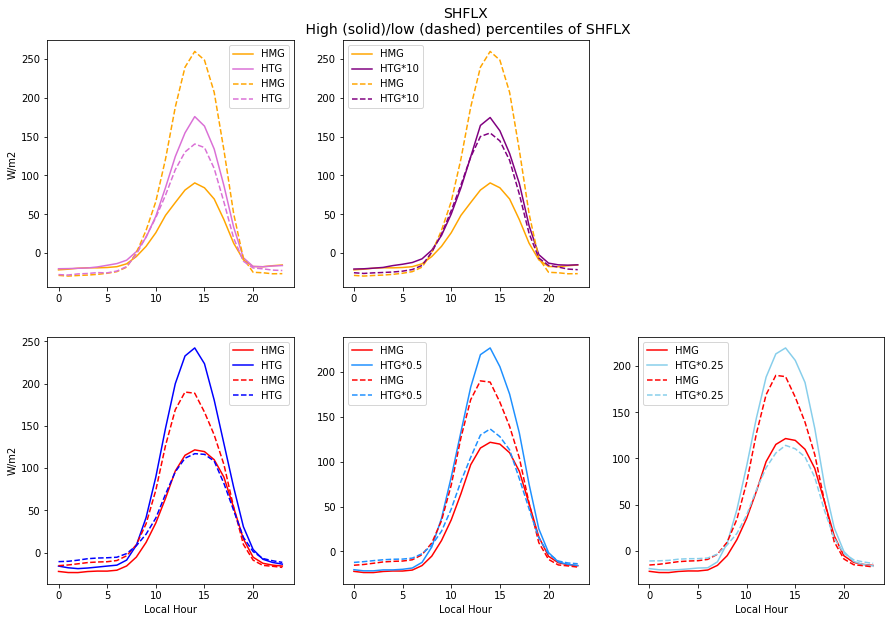

In [266]:
# varSelPlot = varSel

# levSel  = None


# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()

# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
# axs[0].legend()

# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
# axs[1].legend()


# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
# axs[3].legend()

# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
# axs[4].legend()

# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
# axs[5].legend()

# # Set labels
# fig.delaxes(axs[2])
# axs[1].set_title(varSelPlot+'\n High (solid)/low (dashed) percentiles of '+varSel, fontsize=14)

# axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_xlabel('Local Hour')
# axs[4].set_xlabel('Local Hour')
# axs[5].set_xlabel('Local Hour')


(-50.0, 275.0)

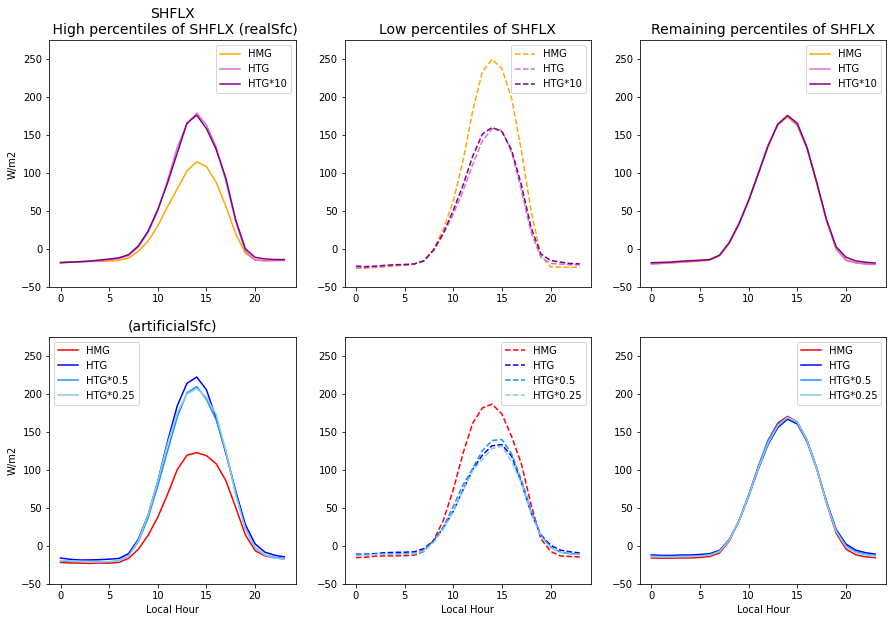

In [231]:
varSelPlot = varSel
levSel     = None


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 275
yMin = -50
# yMax = 0.35
# yMin = 0.0
# yMax = 70
# yMin = -5

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


Text(0.5, 0, 'Local Hour')

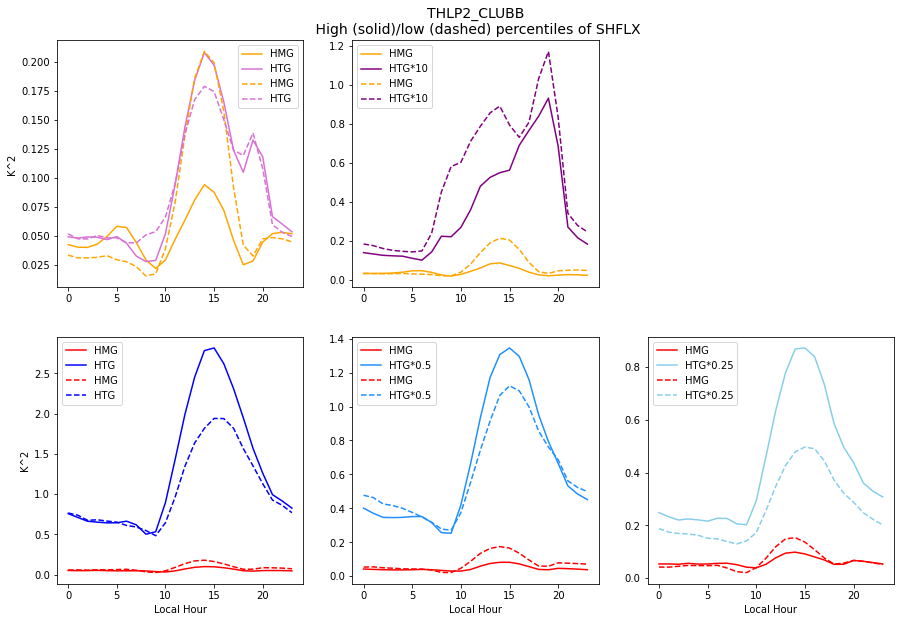

In [233]:
# varSelPlot = 'THLP2_CLUBB'

# levSel = -1


# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()

# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
# axs[0].legend()

# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
# axs[1].legend()


# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
# axs[3].legend()

# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
# axs[4].legend()

# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
# axs[5].legend()

# # Set labels
# fig.delaxes(axs[2])
# axs[1].set_title(varSelPlot+'\n High (solid)/low (dashed) percentiles of '+varSel, fontsize=14)

# axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_xlabel('Local Hour')
# axs[4].set_xlabel('Local Hour')
# axs[5].set_xlabel('Local Hour')



(0.0, 3.0)

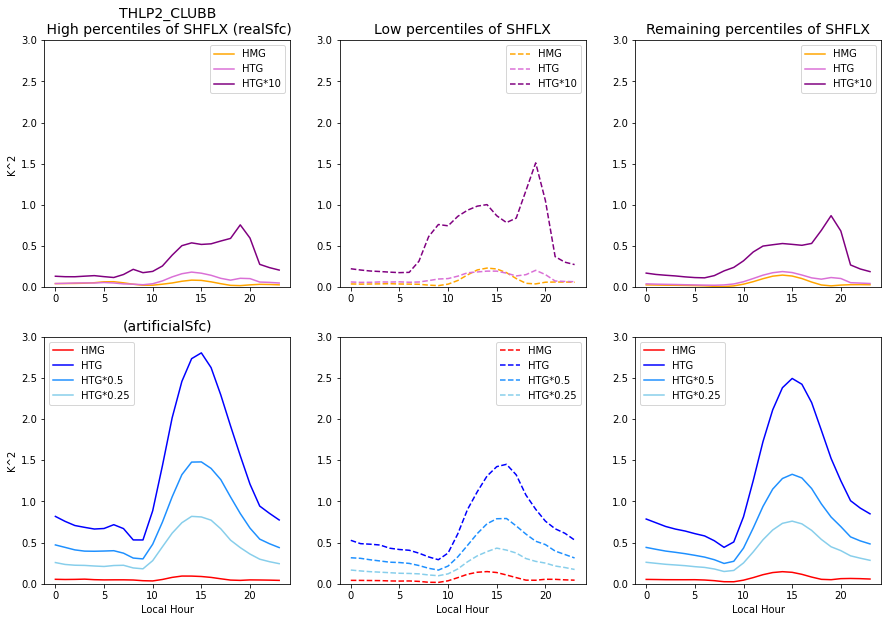

In [232]:
varSelPlot = 'THLP2_CLUBB'

levSel = -1


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 3.0
yMin = 0.0

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


Text(0.5, 0, 'Local Hour')

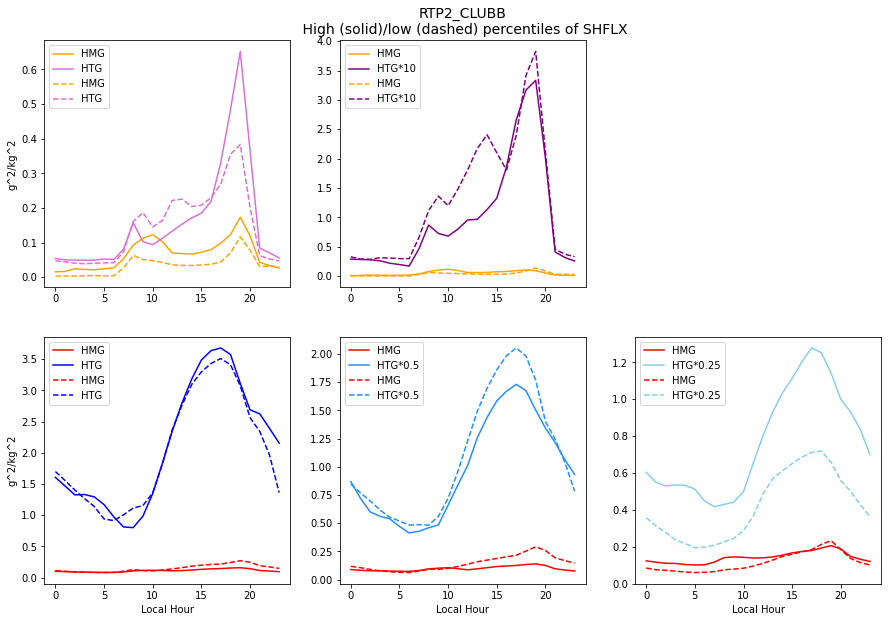

In [234]:
# varSelPlot = 'RTP2_CLUBB'

# levSel  = -1 

# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()

# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
# axs[0].legend()

# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
# axs[1].legend()


# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
# axs[3].legend()

# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
# axs[4].legend()

# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
# axs[5].legend()


# # Set labels
# fig.delaxes(axs[2])
# axs[1].set_title(varSelPlot+'\n High (solid)/low (dashed) percentiles of '+varSel, fontsize=14)

# axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_xlabel('Local Hour')
# axs[4].set_xlabel('Local Hour')
# axs[5].set_xlabel('Local Hour')



(0.0, 4.5)

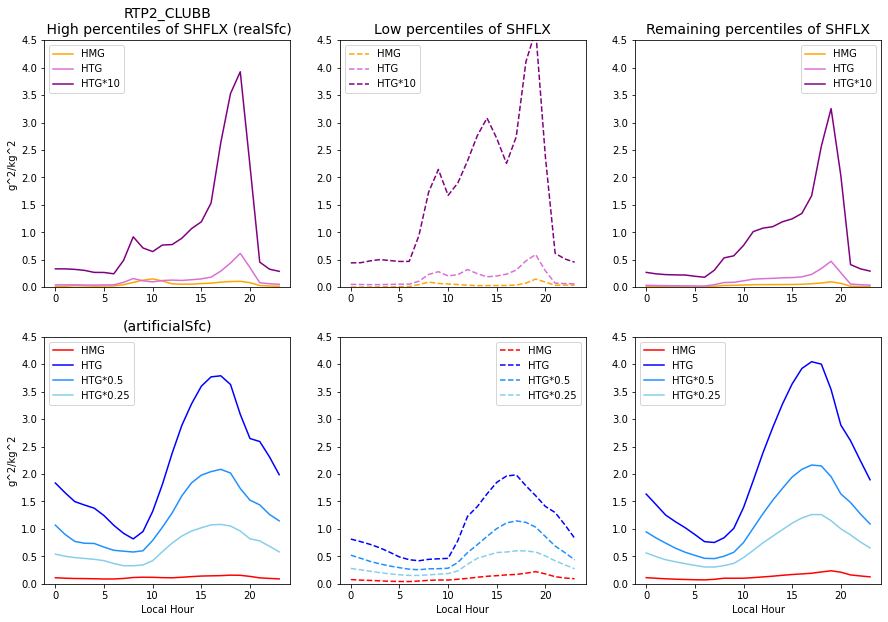

In [233]:
varSelPlot = 'RTP2_CLUBB'

levSel = -1


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 4.5
yMin = 0.0

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


Text(0.5, 0, 'Local Hour')

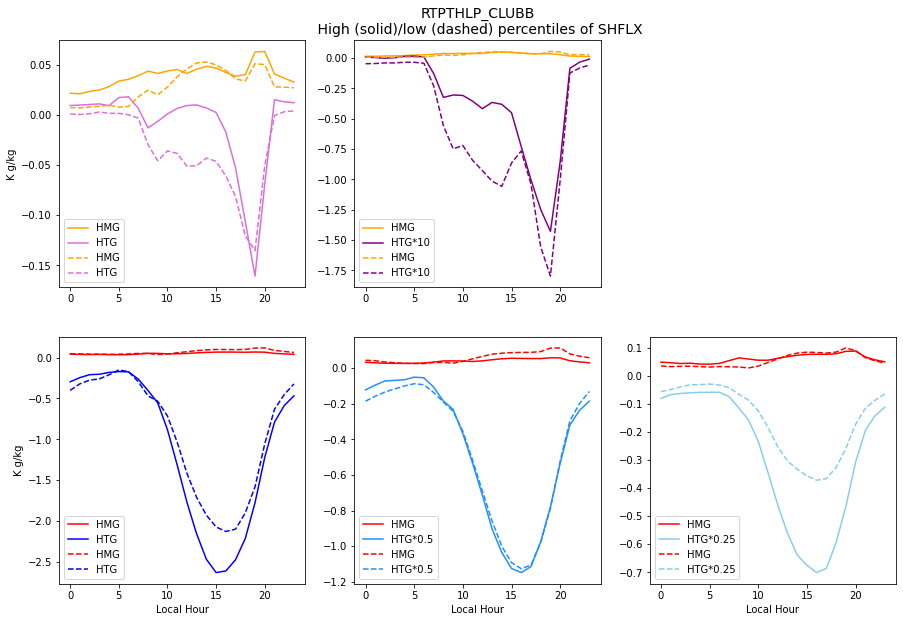

In [235]:
# varSelPlot = 'RTPTHLP_CLUBB'

# levSel  = -1 


# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()

# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
# axs[0].legend()

# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
# axs[1].legend()


# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
# axs[3].legend()

# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
# axs[4].legend()

# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
# axs[5].legend()

# # Set labels
# fig.delaxes(axs[2])
# axs[1].set_title(varSelPlot+'\n High (solid)/low (dashed) percentiles of '+varSel, fontsize=14)

# axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_xlabel('Local Hour')
# axs[4].set_xlabel('Local Hour')
# axs[5].set_xlabel('Local Hour')



(-2.75, 0.2)

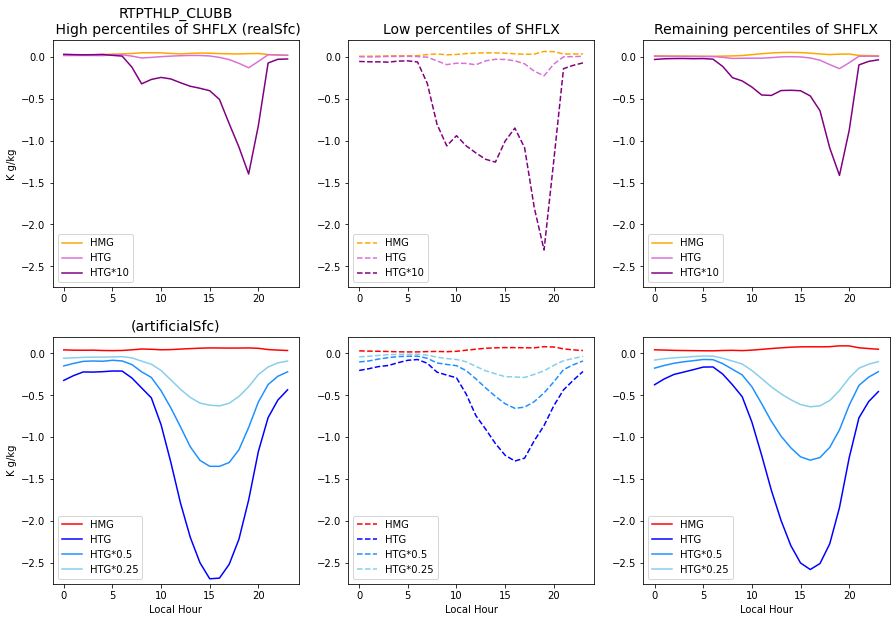

In [234]:
varSelPlot = 'RTPTHLP_CLUBB'

levSel = -1


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')
# Set axis ranges if desired
yMax = 0.2
yMin = -2.75

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


Text(0.5, 0, 'Local Hour')

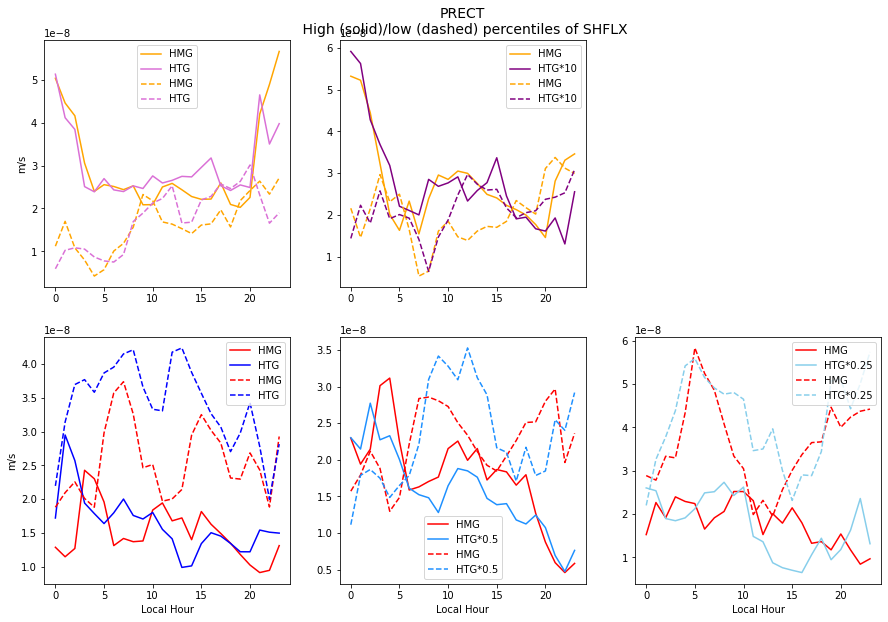

In [236]:
# varSelPlot = 'PRECT'

# levSel  = None


# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()

# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
# axs[0].legend()

# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
# axs[1].legend()


# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
# axs[3].legend()

# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
# axs[4].legend()

# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
# axs[5].legend()

# # Set labels
# fig.delaxes(axs[2])
# axs[1].set_title(varSelPlot+'\n High (solid)/low (dashed) percentiles of '+varSel, fontsize=14)

# axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_xlabel('Local Hour')
# axs[4].set_xlabel('Local Hour')
# axs[5].set_xlabel('Local Hour')



(0.0, 1.3e-07)

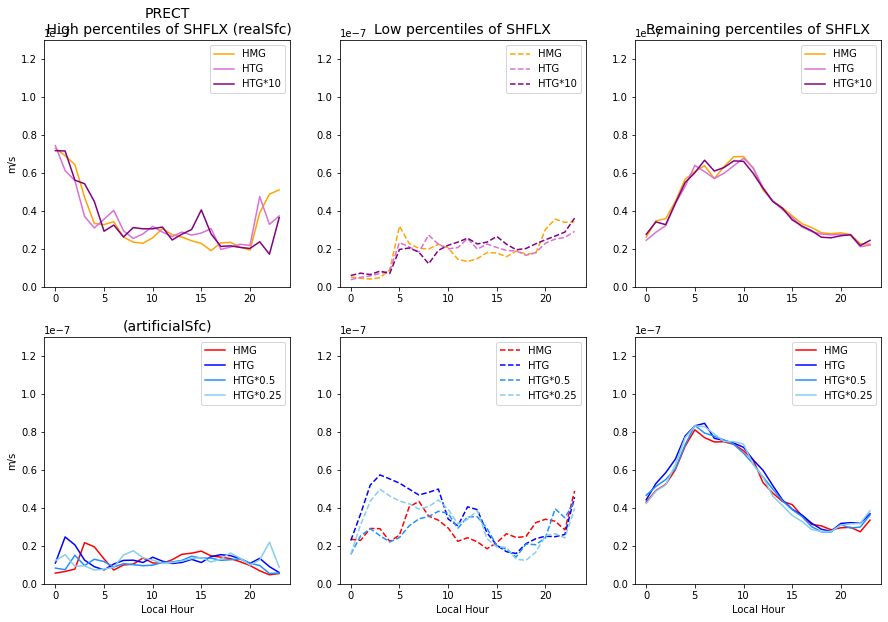

In [235]:
varSelPlot = 'PRECT'

levSel = None


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 1.3e-7
yMin = 0.0
# yMax = 2.0e-7
# yMin = 0.0

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


Text(0.5, 0, 'Local Hour')

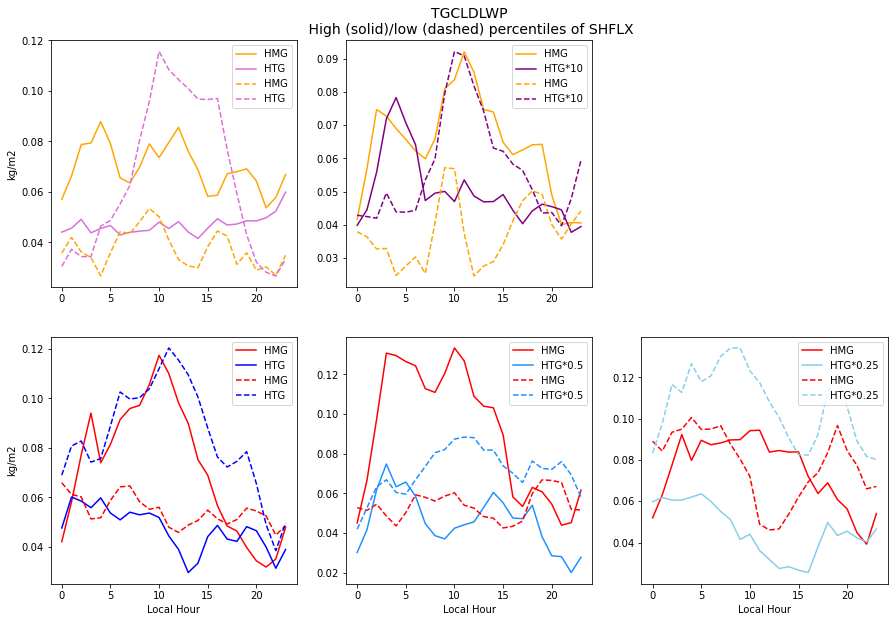

In [237]:
# varSelPlot = 'TGCLDLWP'

# levSel  = None


# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()

# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
# axs[0].legend()

# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
# axs[1].legend()


# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
# axs[3].legend()

# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
# axs[4].legend()

# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
# axs[5].legend()

# # Set labels
# fig.delaxes(axs[2])
# axs[1].set_title(varSelPlot+'\n High (solid)/low (dashed) percentiles of '+varSel, fontsize=14)

# axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_xlabel('Local Hour')
# axs[4].set_xlabel('Local Hour')
# axs[5].set_xlabel('Local Hour')



(0.0, 0.15)

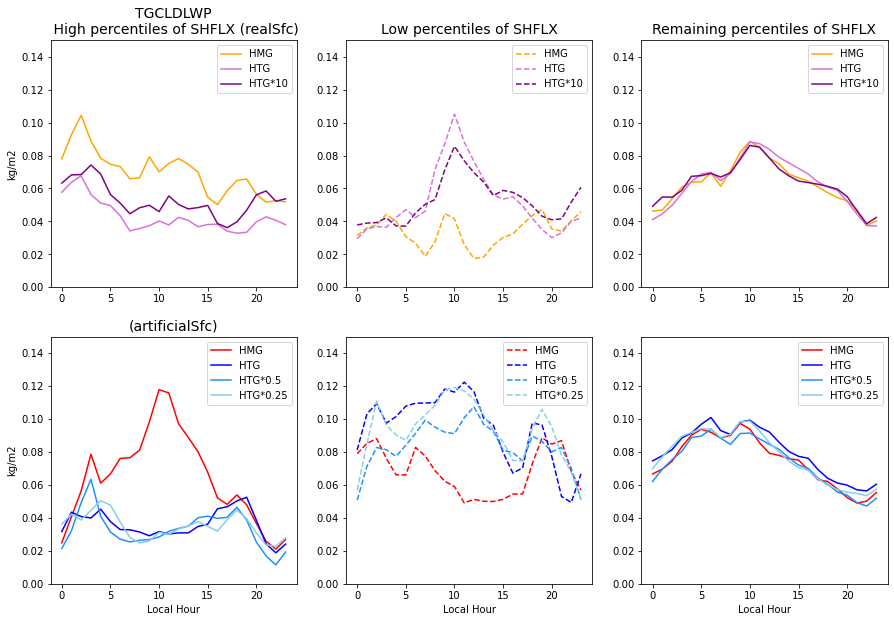

In [236]:
varSelPlot = 'TGCLDLWP'

levSel = None


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')


# Set axis ranges if desired
yMax = 0.15
yMin = 0.0

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


Text(0.5, 0, 'Local Hour')

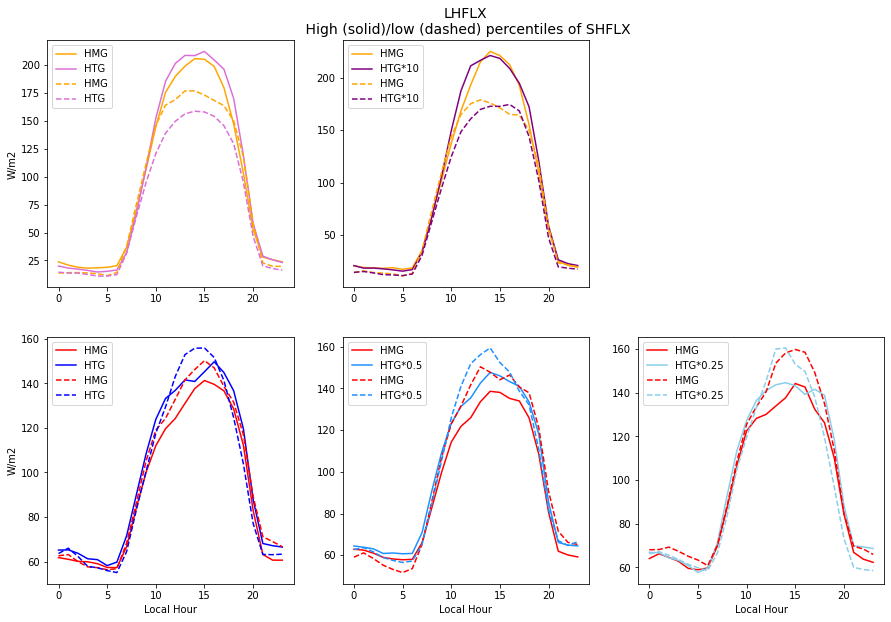

In [238]:
# varSelPlot = 'LHFLX'

# levSel  = None


# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()

# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
# axs[0].legend()

# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
# axs[1].legend()


# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
# axs[3].legend()

# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
# axs[4].legend()

# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
# axs[5].legend()

# # Set labels
# fig.delaxes(axs[2])
# axs[1].set_title(varSelPlot+'\n High (solid)/low (dashed) percentiles of '+varSel, fontsize=14)

# axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_xlabel('Local Hour')
# axs[4].set_xlabel('Local Hour')
# axs[5].set_xlabel('Local Hour')



(-50.0, 200.0)

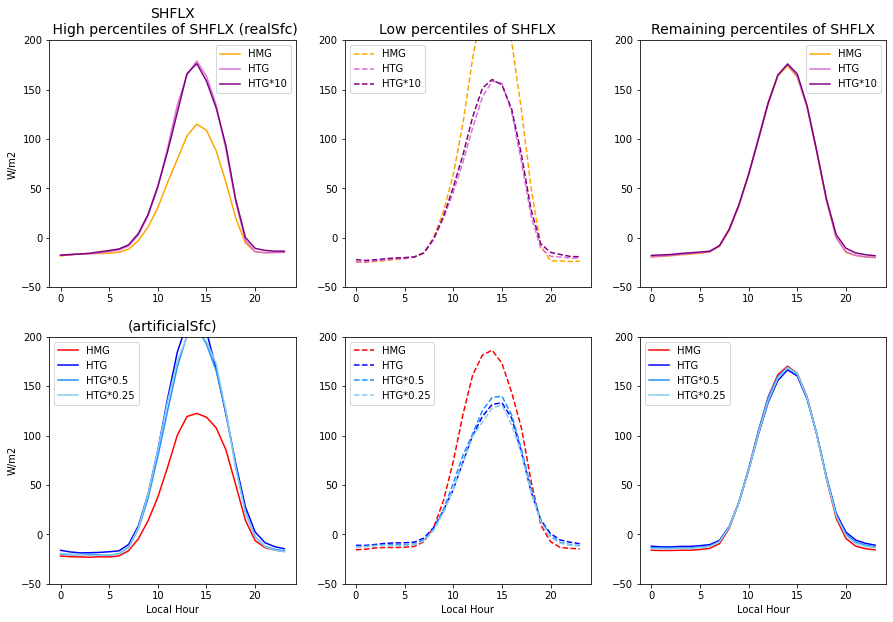

In [237]:
varSelPlot = 'SHFLX'

levSel = None


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')


# Set axis ranges if desired
yMax = 200
yMin = -50

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


(-10.0, 240.0)

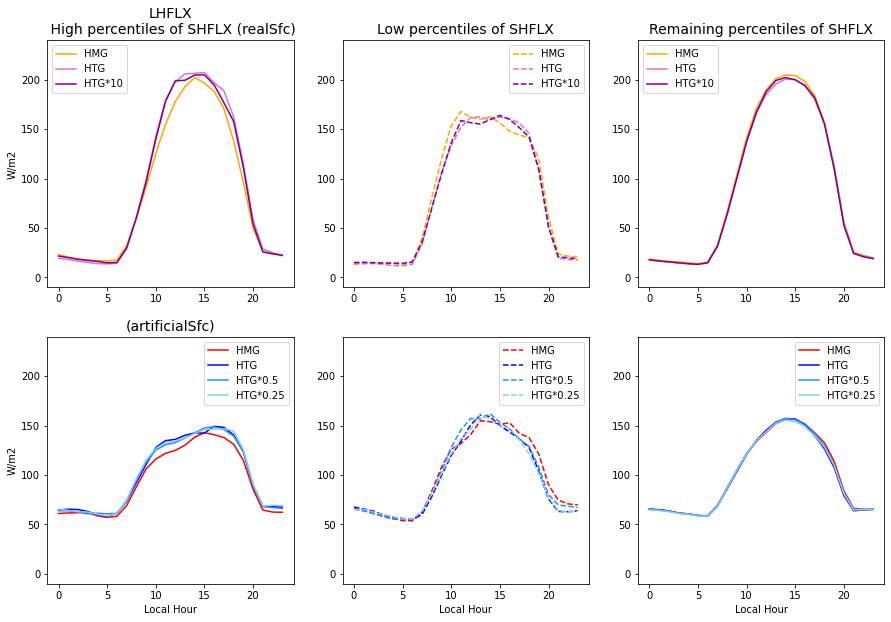

In [238]:
varSelPlot = 'LHFLX'

levSel = None


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')


# Set axis ranges if desired
yMax = 240
yMin = -10

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


Text(0.5, 0, 'Local Hour')

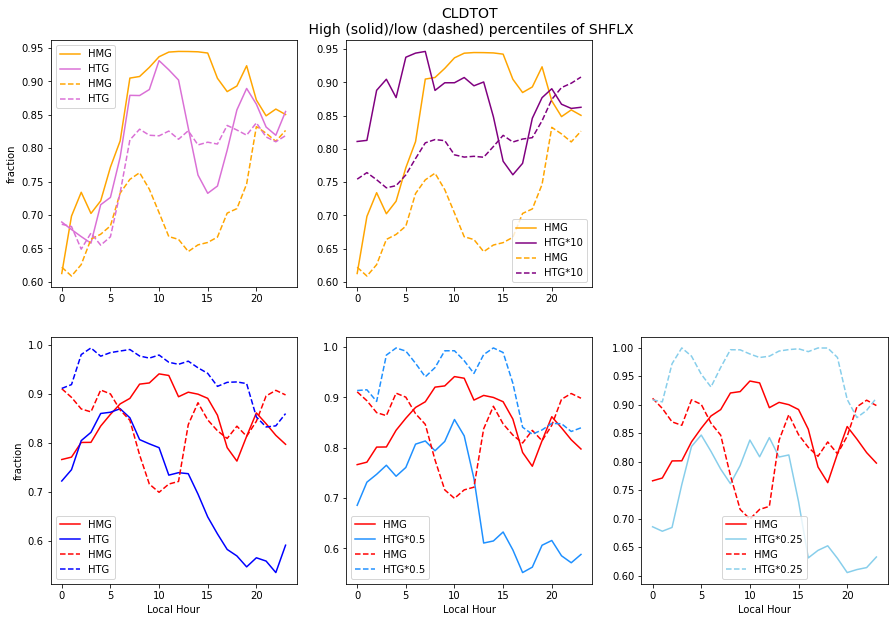

In [276]:
# varSelPlot = 'CLDTOT'

# levSel  = None


# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()

# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[0].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
# axs[0].legend()

# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
# axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
# axs[1].legend()


# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[3].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
# axs[3].legend()

# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
# axs[4].legend()

# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
# axs[5].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
# axs[5].legend()

# # Set labels
# fig.delaxes(axs[2])
# axs[1].set_title(varSelPlot+'\n High (solid)/low (dashed) percentiles of '+varSel, fontsize=14)

# axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
# axs[3].set_xlabel('Local Hour')
# axs[4].set_xlabel('Local Hour')
# axs[5].set_xlabel('Local Hour')



(0.5, 1.0)

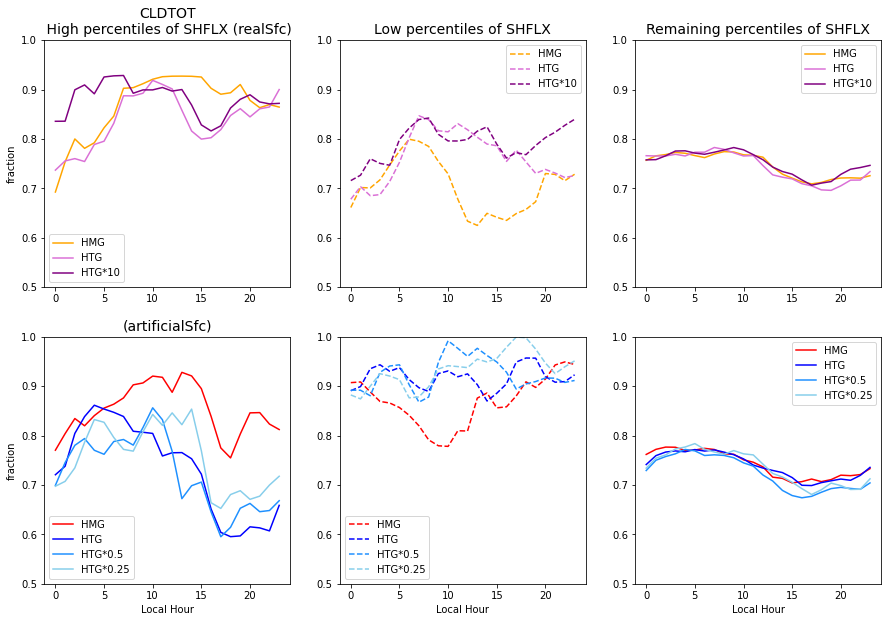

In [239]:
varSelPlot = 'CLDTOT'

levSel = None


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')


# Set axis ranges if desired
yMax = 1.0
yMin = 0.5

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


(0.0, 0.4)

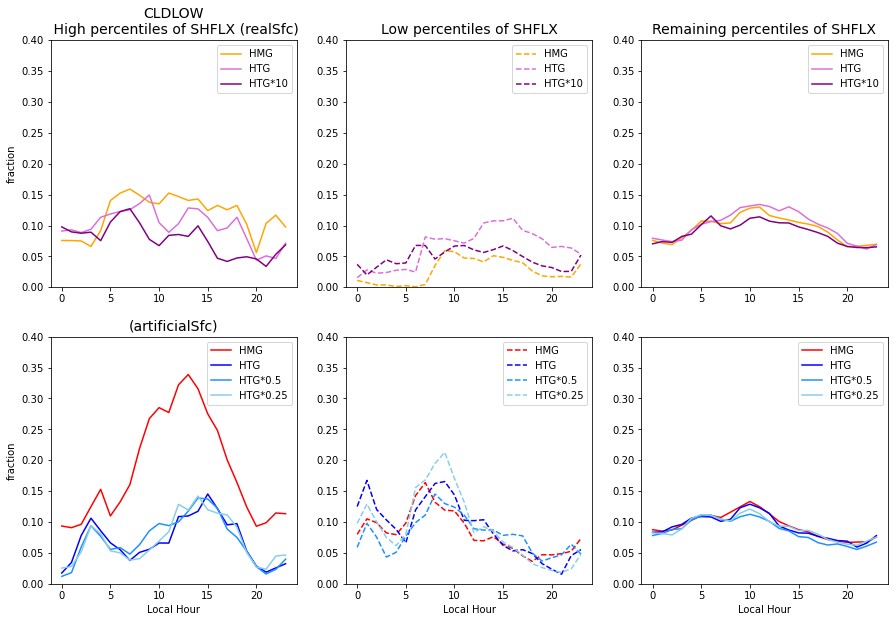

In [240]:
varSelPlot = 'CLDLOW'

levSel = None


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')


# Set axis ranges if desired
yMax = 0.4
yMin = 0.0

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])


(-4.0, 4.0)

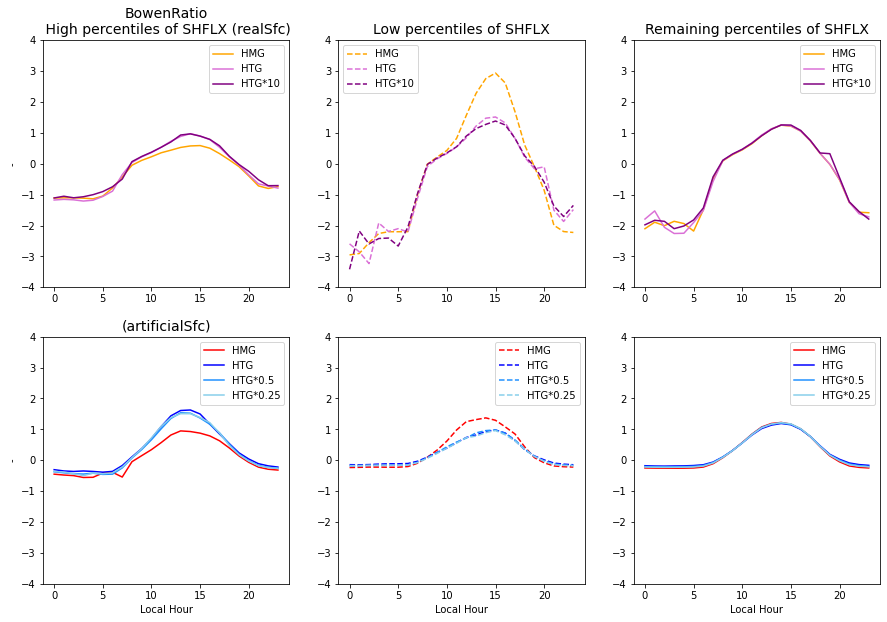

In [241]:
varSelPlot = 'BowenRatio'

levSel  = None

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 4
yMin = -4

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])

# maxHr = 20
# minHr = 7
# axs[0].set_xlim([minHr, maxHr])
# axs[1].set_xlim([minHr, maxHr])
# axs[2].set_xlim([minHr, maxHr])
# axs[3].set_xlim([minHr, maxHr])


(100.0, 2800.0)

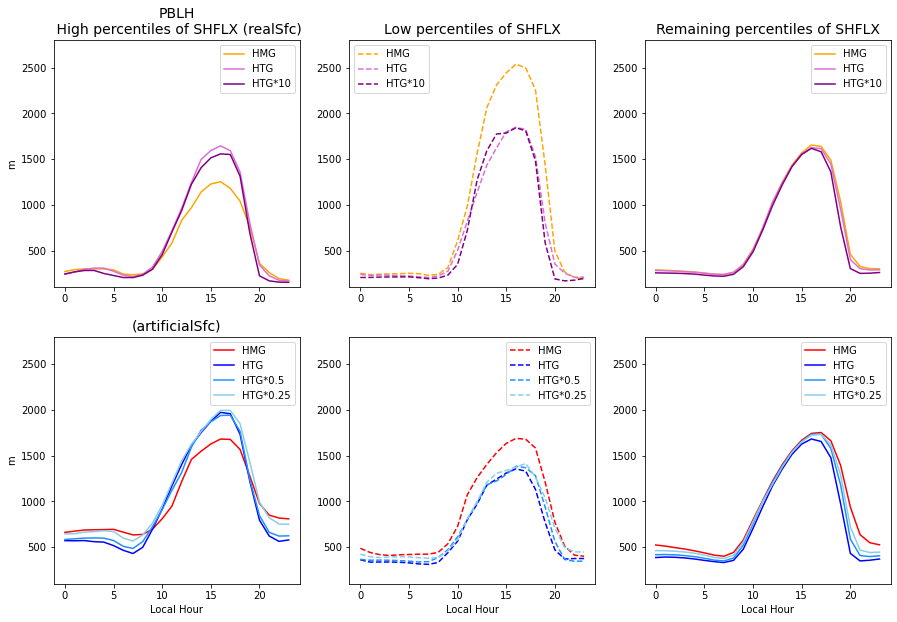

In [242]:
varSelPlot = 'PBLH'

levSel  = None

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()


# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 2800
yMin = 100

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])

# maxHr = 20
# minHr = 7
# axs[0].set_xlim([minHr, maxHr])
# axs[1].set_xlim([minHr, maxHr])
# axs[2].set_xlim([minHr, maxHr])
# axs[3].set_xlim([minHr, maxHr])


(0.0, 2800.0)

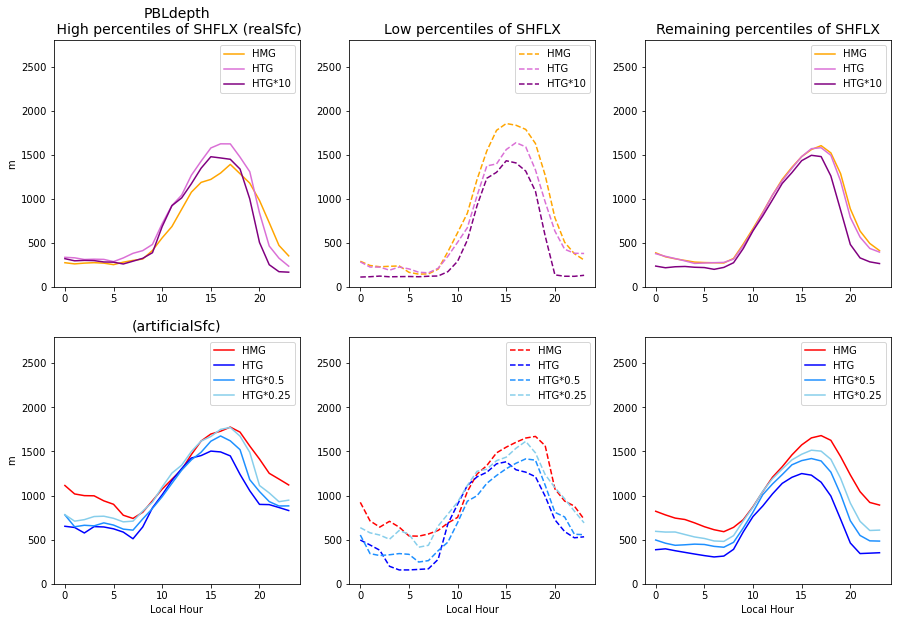

In [243]:
varSelPlot = 'PBLdepth'

levSel  = None

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases['PBLH'].units)
axs[3].set_ylabel(realSfc_allCases['PBLH'].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 2800
yMin = 0

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])

# maxHr = 20
# minHr = 7
# axs[0].set_xlim([minHr, maxHr])
# axs[1].set_xlim([minHr, maxHr])
# axs[2].set_xlim([minHr, maxHr])
# axs[3].set_xlim([minHr, maxHr])


(300.0, 320.0)

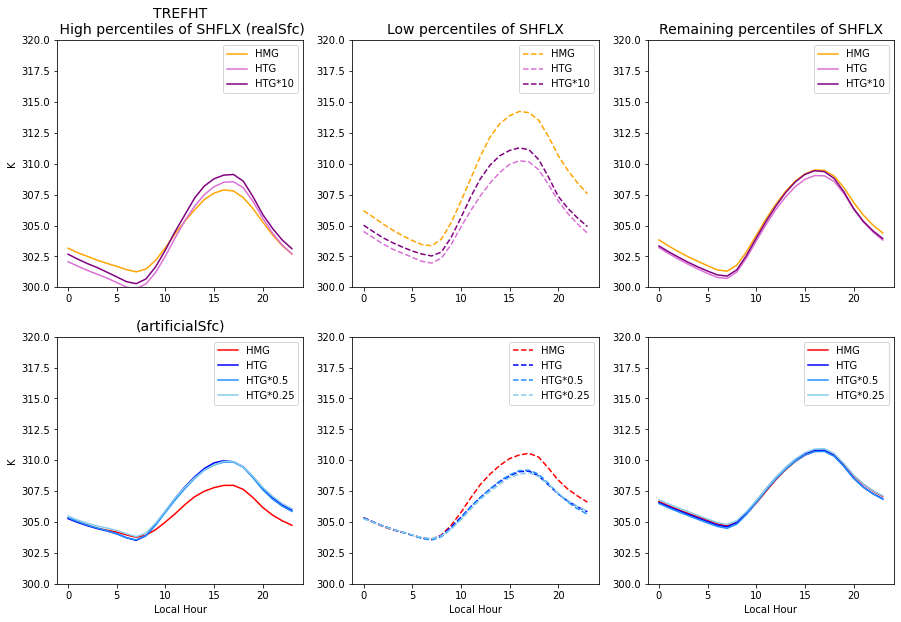

In [244]:
varSelPlot = 'TREFHT'

levSel  = None

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 320
yMin = 300

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])

# maxHr = 20
# minHr = 7
# axs[0].set_xlim([minHr, maxHr])
# axs[1].set_xlim([minHr, maxHr])
# axs[2].set_xlim([minHr, maxHr])
# axs[3].set_xlim([minHr, maxHr])


(0.013, 0.0235)

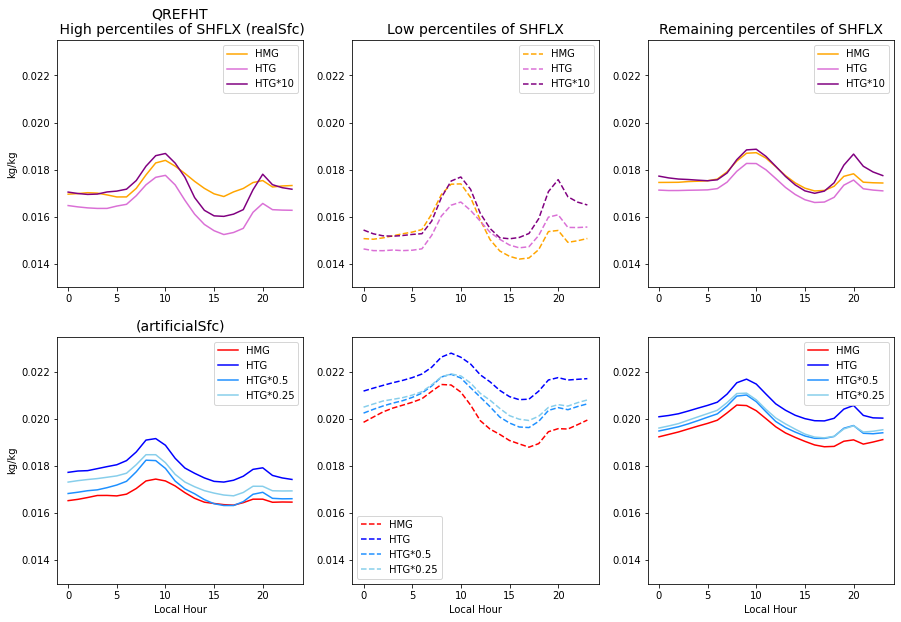

In [245]:
varSelPlot = 'QREFHT'

levSel  = None

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 0.0235
yMin = 0.013

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])

# maxHr = 20
# minHr = 7
# axs[0].set_xlim([minHr, maxHr])
# axs[1].set_xlim([minHr, maxHr])
# axs[2].set_xlim([minHr, maxHr])
# axs[3].set_xlim([minHr, maxHr])


(0.0, 5.0)

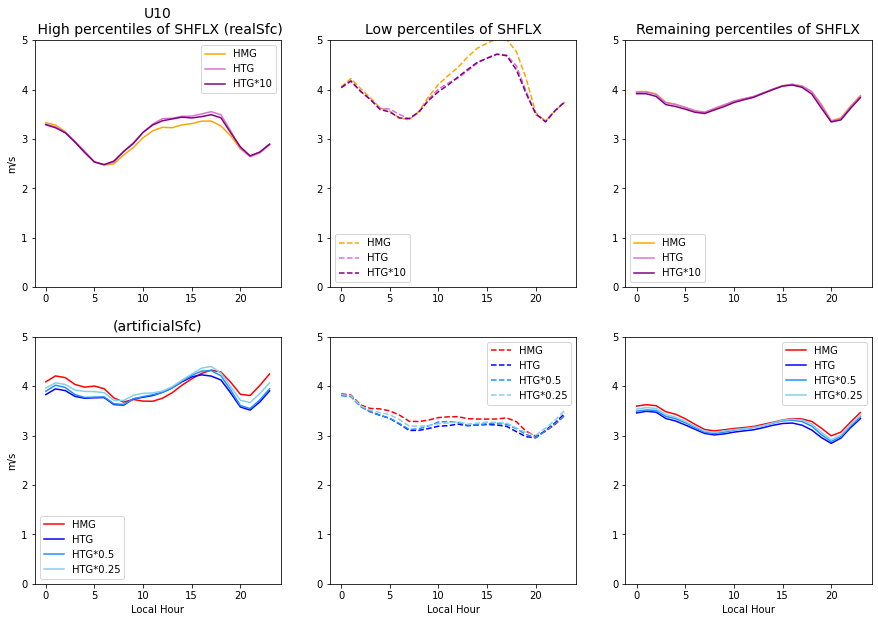

In [246]:
varSelPlot = 'U10'

levSel  = None

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 5
yMin = 0

axs[0].set_ylim([yMin, yMax])
axs[1].set_ylim([yMin, yMax])
axs[2].set_ylim([yMin, yMax])
axs[3].set_ylim([yMin, yMax])
axs[4].set_ylim([yMin, yMax])
axs[5].set_ylim([yMin, yMax])

# maxHr = 20
# minHr = 7
# axs[0].set_xlim([minHr, maxHr])
# axs[1].set_xlim([minHr, maxHr])
# axs[2].set_xlim([minHr, maxHr])
# axs[3].set_xlim([minHr, maxHr])


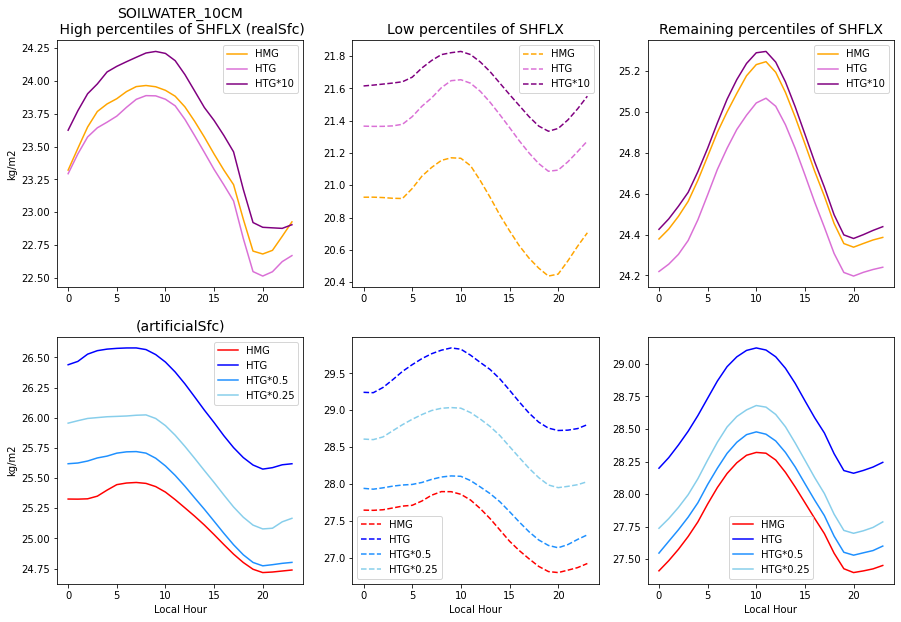

In [247]:
varSelPlot = 'SOILWATER_10CM'

levSel  = None

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcCLM[varSelPlot].values[:,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcCLM[varSelPlot].values[:,1],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcCLM[varSelPlot].values[:,2],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcCLM[varSelPlot].values[:,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcCLM[varSelPlot].values[:,1],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcCLM[varSelPlot].values[:,2],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfcCLM[varSelPlot].values[:,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfcCLM[varSelPlot].values[:,1],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfcCLM[varSelPlot].values[:,2],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcCLM[varSelPlot].values[:,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcCLM[varSelPlot].values[:,1],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcCLM[varSelPlot].values[:,2],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcCLM[varSelPlot].values[:,3],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcCLM[varSelPlot].values[:,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcCLM[varSelPlot].values[:,1],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcCLM[varSelPlot].values[:,2],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcCLM[varSelPlot].values[:,3],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfcCLM[varSelPlot].values[:,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfcCLM[varSelPlot].values[:,1],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfcCLM[varSelPlot].values[:,2],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfcCLM[varSelPlot].values[:,3],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfcCLM_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfcCLM_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')

# Set axis ranges if desired
yMax = 30
yMin = 20

# axs[0].set_ylim([yMin, yMax])
# axs[1].set_ylim([yMin, yMax])
# axs[2].set_ylim([yMin, yMax])
# axs[3].set_ylim([yMin, yMax])
# axs[4].set_ylim([yMin, yMax])
# axs[5].set_ylim([yMin, yMax])

# maxHr = 20
# minHr = 7
# axs[0].set_xlim([minHr, maxHr])
# axs[1].set_xlim([minHr, maxHr])
# axs[2].set_xlim([minHr, maxHr])
# axs[3].set_xlim([minHr, maxHr])


In [100]:
realSfcCLM_allCases

<xarray.Dataset>
Dimensions:                        (case: 3, cft: 2, glc_nec: 10, hist_interval: 2, levgrnd: 25, levlak: 10, levsoi: 20, lndgrid: 1, ltype: 9, natpft: 15, nvegwcs: 4, time: 100224)
Coordinates:
  * levgrnd                        (levgrnd) float32 0.01 0.04 ... 28.87 42.0
  * levsoi                         (levsoi) float32 0.01 0.04 0.09 ... 6.94 8.03
  * levlak                         (levlak) float32 0.05 0.6 2.1 ... 34.33 44.78
  * time                           (time) datetime64[ns] 2015-06-02T18:32:15 ...
    year_month_day                 (time) object (2015, 6, 2) ... (2018, 8, 28)
  * case                           (case) <U5 'HMG' 'HTG' 'HTG10'
Dimensions without coordinates: cft, glc_nec, hist_interval, lndgrid, ltype, natpft, nvegwcs
Data variables:
    TOTSOILLIQ                     (case, time, lndgrid) float32 2.313e+03 .....
    ERRSEB                         (case, time, lndgrid) float32 -2.123e-14 ....
    QINFL                          (case, time, lndgrid) float32 -2.698e-06 ....
    FH2OSFC                        (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    WPTHLP2_CLUBB                  (case, time, lndgrid) float32 0.0 ... 0.00...
    QSNOUNLOAD                     (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    Jmx25Z                         (case, time, lndgrid) float32 66.1 ... 66.1
    TSOI_10CM                      (case, time, lndgrid) float32 305.8 ... 310.3
    FPSN                           (case, time, lndgrid) float32 6.037 ... 8.205
    PBOT                           (case, time, lndgrid) float32 9.714e+04 .....
    ERRSOL                         (case, time, lndgrid) float32 5.548e-14 .....
    THBOT                          (case, time, lndgrid) float32 304.1 ... 310.2
    WPTHLP_CLUBB                   (case, time, lndgrid) float32 0.01677 ... ...
    FGEV                           (case, time, lndgrid) float32 22.2 ... 66.15
    VEGWP                          (case, time, nvegwcs, lndgrid) float32 -2....
    SMP                            (case, time, levgrnd, lndgrid) float32 -5....
    QFLX_LIQEVAP_FROM_TOP_LAYER    (case, time, lndgrid) float32 8.879e-06 .....
    PCT_GLC_MEC                    (case, time, glc_nec, lndgrid) float32 0.0...
    SNOW_SINKS                     (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    QFLX_SOLIDDEW_TO_TOP_LAYER     (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    PCT_LANDUNIT                   (case, time, ltype, lndgrid) float32 48.85...
    VPWP_CLUBB                     (case, time, lndgrid) float32 -0.2071 ... ...
    HEAT_CONTENT1                  (case, time, lndgrid) float32 2.017e+09 .....
    SNOW_SOURCES                   (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    H2OSOI                         (case, time, levsoi, lndgrid) float32 0.15...
    TREFMNAV                       (case, time, lndgrid) float32 nan nan ... nan
    BCDEP                          (case, time, lndgrid) float32 1.449e-12 .....
    EFLX_LH_TOT_R                  (case, time, lndgrid) float32 181.4 ... 234.9
    QHR                            (case, time, lndgrid) float32 -4.552e-07 ....
    LAKEICEFRAC_SURF               (case, time, lndgrid) float32 nan nan ... nan
    QDRAI_XS                       (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    QIRRIG_FROM_GW_CONFINED        (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    SNOW                           (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    FIRE                           (case, time, lndgrid) float32 485.9 ... 528.1
    DZSOI                          (case, levgrnd, lndgrid) float32 0.02 ... ...
    TREFMXAV                       (case, time, lndgrid) float32 nan nan ... nan
    QFLX_SNOW_DRAIN                (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    mcsec                          (case, time) int32 84885 85185 ... 84585
    SNOINTABS                      (case, time, lndgrid) float32 0.0 0.0 ... 0.0
    time_written                   (case, time) |S16 b'14:17:1

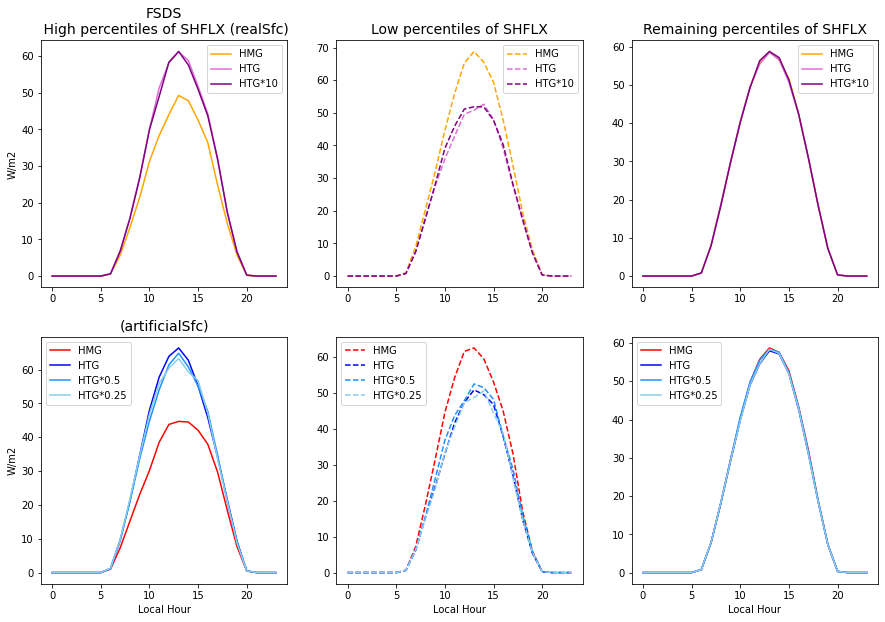

In [248]:
varSelPlot = 'FSDS'

levSel = None


fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

# Real surface 
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[0].plot(np.arange(24), hourlyMean_highPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],color='purple',label='HTG*10')
axs[0].legend()

axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='orange',label='HMG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='orchid',label='HTG')
axs[1].plot(np.arange(24), hourlyMean_lowPct_realSfcHTG10[varSelPlot].values[:,1,levSel,0,0],'--',color='purple',label='HTG*10')
axs[1].legend()

axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,0,levSel,0,0],color='orange',label='HMG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,1,levSel,0,0],color='orchid',label='HTG')
axs[2].plot(np.arange(24), hourlyMean_restOfDays_realSfc[varSelPlot].values[:,2,levSel,0,0],color='purple',label='HTG*10')
axs[2].legend()



# Artificial surface 
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],color='r',label='HMG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],color='b',label='HTG')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],color='dodgerblue',label='HTG*0.5')
axs[3].plot(np.arange(24), hourlyMean_highPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],color='skyblue',label='HTG*0.25')
axs[3].legend()


axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,0,levSel,0,0],'--',color='r',label='HMG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG[varSelPlot].values[:,1,levSel,0,0],'--',color='b',label='HTG')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG5[varSelPlot].values[:,1,levSel,0,0],'--',color='dodgerblue',label='HTG*0.5')
axs[4].plot(np.arange(24), hourlyMean_lowPct_artSfcHTG25[varSelPlot].values[:,1,levSel,0,0],'--',color='skyblue',label='HTG*0.25')
axs[4].legend()

axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,0,levSel,0,0],'-',color='r',label='HMG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,1,levSel,0,0],'-',color='b',label='HTG')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,2,levSel,0,0],'-',color='dodgerblue',label='HTG*0.5')
axs[5].plot(np.arange(24), hourlyMean_restOfDays_artSfc[varSelPlot].values[:,3,levSel,0,0],'-',color='skyblue',label='HTG*0.25')
axs[5].legend()


# Set labels
axs[0].set_title(varSelPlot+'\n High percentiles of '+varSel+' (realSfc)', fontsize=14)
axs[1].set_title('Low percentiles of '+varSel, fontsize=14)
axs[2].set_title('Remaining percentiles of '+varSel, fontsize=14)
axs[3].set_title('(artificialSfc)', fontsize=14)

axs[0].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_ylabel(realSfc_allCases[varSelPlot].units)
axs[3].set_xlabel('Local Hour')
axs[4].set_xlabel('Local Hour')
axs[5].set_xlabel('Local Hour')
# Set axis ranges if desired
yMax = 0.2
yMin = -2.75

# axs[0].set_ylim([yMin, yMax])
# axs[1].set_ylim([yMin, yMax])
# axs[2].set_ylim([yMin, yMax])
# axs[3].set_ylim([yMin, yMax])
# axs[4].set_ylim([yMin, yMax])
# axs[5].set_ylim([yMin, yMax])


In [111]:
realSfc_allCases.FSDS.long_name

'Downwelling solar flux at surface'

**Plot large scale forcing**

Text(0.5, 1.0, 'HTG*0.25')

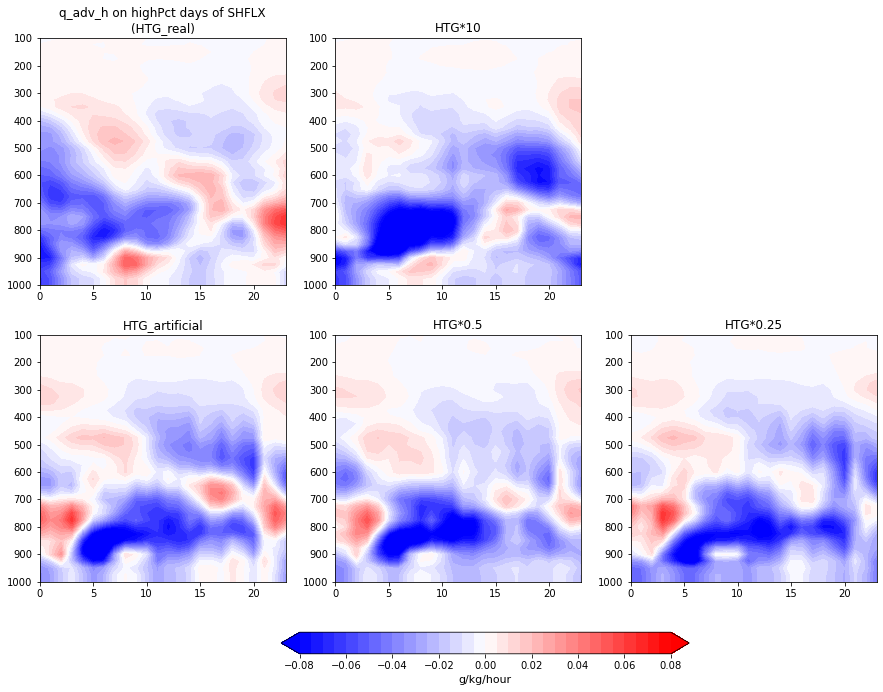

In [240]:
# varSelPlot = 'q_adv_h'
# levs = np.arange(-0.08, 0.085, 0.005)

# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()
# fig.delaxes(axs[2])

# hours   = hourlyMean_highPct_realSfcHTG_obs['hour'].values
# levAtm  =  hourlyMean_highPct_realSfcHTG_obs['lev'].values

# axs[0].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_realSfcHTG_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')
# axs[1].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_realSfcHTG10_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')

# axs[3].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_artSfcHTG_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')

# cp = axs[4].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_artSfcHTG5_obs[varSelPlot].values), 
#                      levs, cmap='bwr', extend='both')
# # Add colorbar
# ax_position = axs[4].get_position()
# cbar_ax = fig.add_axes([ax_position.x0-0.05, ax_position.y0-0.1, ax_position.width+0.15, 0.03])
# cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax)
# cbar.set_label(nateDS_local[varSelPlot].units,fontsize=11)

# axs[5].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_artSfcHTG25_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')


# # Invert axes and set up titles/labels
# axs[0].invert_yaxis()
# axs[1].invert_yaxis()
# axs[3].invert_yaxis()
# axs[4].invert_yaxis()
# axs[5].invert_yaxis()

# axs[0].set_title(varSelPlot+' on highPct days of '+varSel+'\n(HTG_real)')
# axs[1].set_title('HTG*10')
# axs[3].set_title('HTG_artificial')
# axs[4].set_title('HTG*0.5')
# axs[5].set_title('HTG*0.25')



Text(0.5, 1.0, 'HTG*0.25')

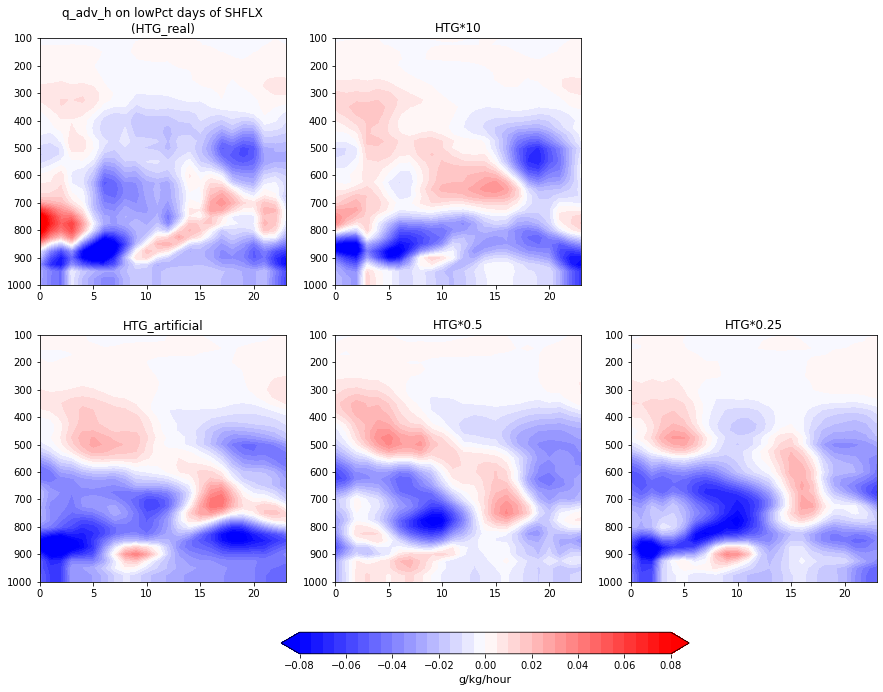

In [241]:
# varSelPlot = 'q_adv_h'
# levs = np.arange(-0.08, 0.085, 0.005)

# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()
# fig.delaxes(axs[2])

# hours   = hourlyMean_highPct_realSfcHTG_obs['hour'].values
# levAtm  =  hourlyMean_highPct_realSfcHTG_obs['lev'].values

# axs[0].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_realSfcHTG_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')
# axs[1].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_realSfcHTG10_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')

# axs[3].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_artSfcHTG_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')

# cp = axs[4].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_artSfcHTG5_obs[varSelPlot].values), 
#                      levs, cmap='bwr', extend='both')
# # Add colorbar
# ax_position = axs[4].get_position()
# cbar_ax = fig.add_axes([ax_position.x0-0.05, ax_position.y0-0.1, ax_position.width+0.15, 0.03])
# cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax)
# cbar.set_label(nateDS_local[varSelPlot].units,fontsize=11)

# axs[5].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_artSfcHTG25_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')


# # Invert axes and set up titles/labels
# axs[0].invert_yaxis()
# axs[1].invert_yaxis()
# axs[3].invert_yaxis()
# axs[4].invert_yaxis()
# axs[5].invert_yaxis()

# axs[0].set_title(varSelPlot+' on lowPct days of '+varSel+'\n(HTG_real)')
# axs[1].set_title('HTG*10')
# axs[3].set_title('HTG_artificial')
# axs[4].set_title('HTG*0.5')
# axs[5].set_title('HTG*0.25')



Text(0.5, 1.0, 'On remaining percentiles days of SHFLX (artificialSfc)')

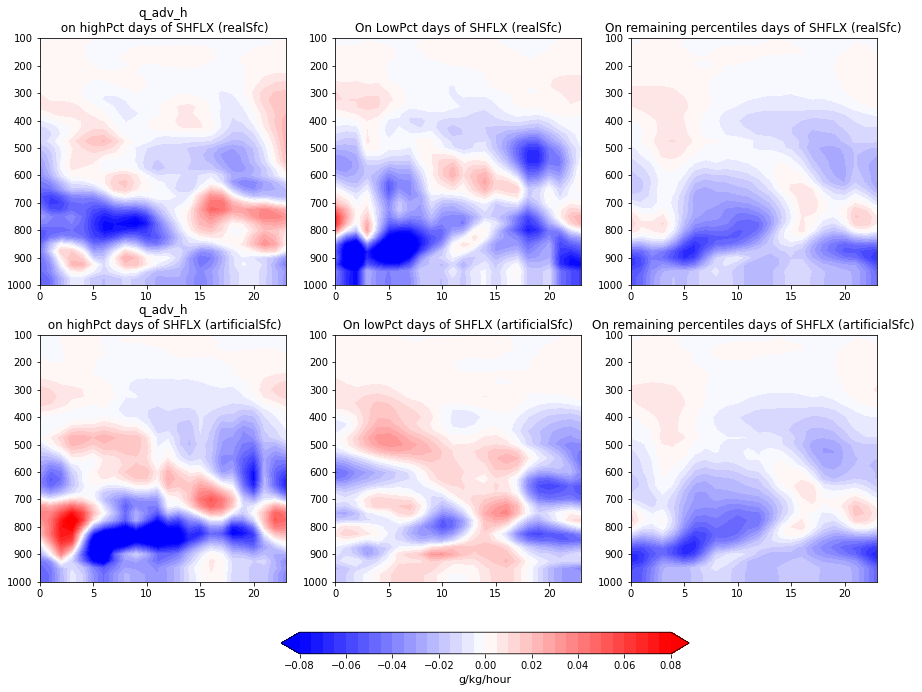

In [249]:
varSelPlot = 'q_adv_h'
levs = np.arange(-0.08, 0.085, 0.005)

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

hours   = hourlyMean_highPct_realSfcHTG_obs['hour'].values
levAtm  =  hourlyMean_highPct_realSfcHTG_obs['lev'].values

axs[0].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_realSfcHTG_obs[varSelPlot].values), 
                levs, cmap='bwr', extend='both')
axs[1].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_realSfcHTG_obs[varSelPlot].values), 
                levs, cmap='bwr', extend='both')
axs[2].contourf(hours, levAtm, np.transpose(hourlyMean_restOfDays_realSfc_obs[varSelPlot].values), 
                levs, cmap='bwr', extend='both')


axs[3].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_artSfcHTG_obs[varSelPlot].values), 
                     levs, cmap='bwr', extend='both')
cp = axs[4].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_artSfcHTG_obs[varSelPlot].values), 
                     levs, cmap='bwr', extend='both')
# Add colorbar
ax_position = axs[4].get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.05, ax_position.y0-0.1, ax_position.width+0.15, 0.03])
cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax)
cbar.set_label(nateDS_local[varSelPlot].units,fontsize=11)

axs[5].contourf(hours, levAtm, np.transpose(hourlyMean_restOfDays_artSfc_obs[varSelPlot].values), 
                     levs, cmap='bwr', extend='both')


# Invert axes and set up titles/labels
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[0].set_title(varSelPlot+'\n on highPct days of '+varSel+' (realSfc)')
axs[1].set_title('On LowPct days of '+varSel+' (realSfc)')
axs[2].set_title('On remaining percentiles days of '+varSel+' (realSfc)')

axs[3].set_title(varSelPlot+'\n on highPct days of '+varSel+' (artificialSfc)')
axs[4].set_title('On lowPct days of '+varSel+' (artificialSfc)')
axs[5].set_title('On remaining percentiles days of '+varSel+' (artificialSfc)')


Text(0.5, 1.0, 'HTG*0.25')

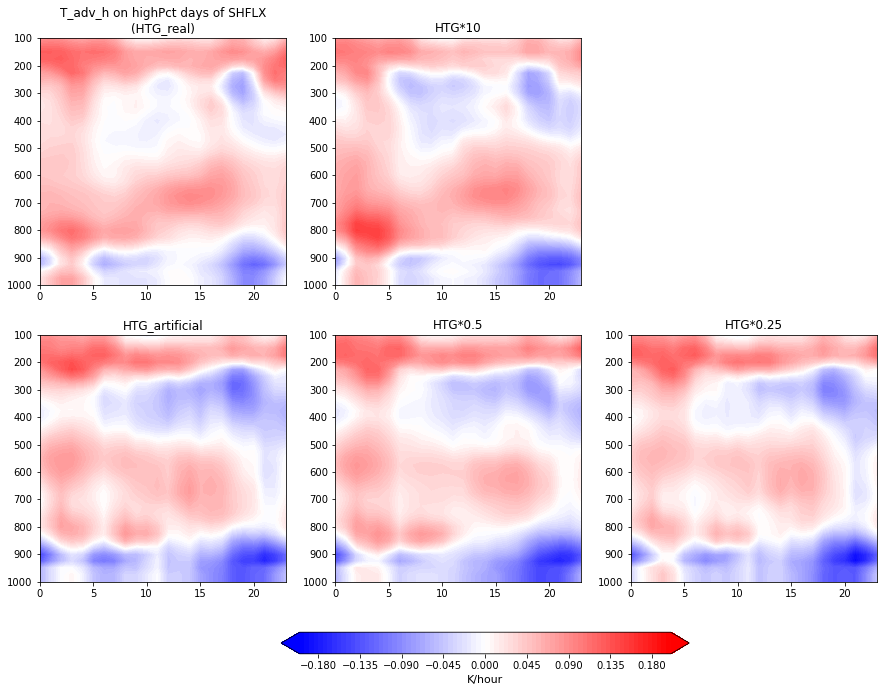

In [242]:
# varSelPlot = 'T_adv_h'
# levs = np.arange(-0.2, 0.205, 0.005)

# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()
# fig.delaxes(axs[2])

# hours   = hourlyMean_highPct_realSfcHTG_obs['hour'].values
# levAtm  =  hourlyMean_highPct_realSfcHTG_obs['lev'].values

# axs[0].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_realSfcHTG_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')
# axs[1].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_realSfcHTG10_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')

# axs[3].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_artSfcHTG_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')

# cp = axs[4].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_artSfcHTG5_obs[varSelPlot].values), 
#                      levs, cmap='bwr', extend='both')
# # Add colorbar
# ax_position = axs[4].get_position()
# cbar_ax = fig.add_axes([ax_position.x0-0.05, ax_position.y0-0.1, ax_position.width+0.15, 0.03])
# cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax)
# cbar.set_label(nateDS_local[varSelPlot].units,fontsize=11)

# axs[5].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_artSfcHTG25_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')


# # Invert axes and set up titles/labels
# axs[0].invert_yaxis()
# axs[1].invert_yaxis()
# axs[3].invert_yaxis()
# axs[4].invert_yaxis()
# axs[5].invert_yaxis()

# axs[0].set_title(varSelPlot+' on highPct days of '+varSel+'\n(HTG_real)')
# axs[1].set_title('HTG*10')
# axs[3].set_title('HTG_artificial')
# axs[4].set_title('HTG*0.5')
# axs[5].set_title('HTG*0.25')



Text(0.5, 1.0, 'HTG*0.25')

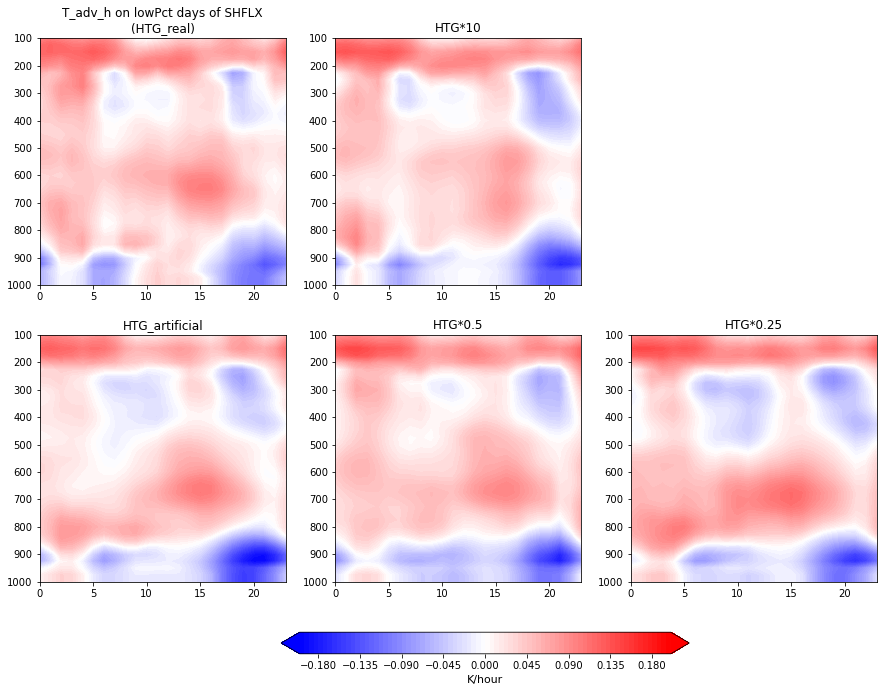

In [243]:
# varSelPlot = 'T_adv_h'
# levs = np.arange(-0.2, 0.205, 0.005)

# fig,axs = plt.subplots(2,3, figsize=(15,10))
# axs     = axs.ravel()
# fig.delaxes(axs[2])

# hours   = hourlyMean_highPct_realSfcHTG_obs['hour'].values
# levAtm  =  hourlyMean_highPct_realSfcHTG_obs['lev'].values

# axs[0].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_realSfcHTG_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')
# axs[1].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_realSfcHTG10_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')

# axs[3].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_artSfcHTG_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')

# cp = axs[4].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_artSfcHTG5_obs[varSelPlot].values), 
#                      levs, cmap='bwr', extend='both')
# # Add colorbar
# ax_position = axs[4].get_position()
# cbar_ax = fig.add_axes([ax_position.x0-0.05, ax_position.y0-0.1, ax_position.width+0.15, 0.03])
# cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax)
# cbar.set_label(nateDS_local[varSelPlot].units,fontsize=11)

# axs[5].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_artSfcHTG25_obs[varSelPlot].values), 
#                 levs, cmap='bwr', extend='both')


# # Invert axes and set up titles/labels
# axs[0].invert_yaxis()
# axs[1].invert_yaxis()
# axs[3].invert_yaxis()
# axs[4].invert_yaxis()
# axs[5].invert_yaxis()

# axs[0].set_title(varSelPlot+' on lowPct days of '+varSel+'\n(HTG_real)')
# axs[1].set_title('HTG*10')
# axs[3].set_title('HTG_artificial')
# axs[4].set_title('HTG*0.5')
# axs[5].set_title('HTG*0.25')



Text(0.5, 1.0, 'On remaining percentiles days of SHFLX (artificialSfc)')

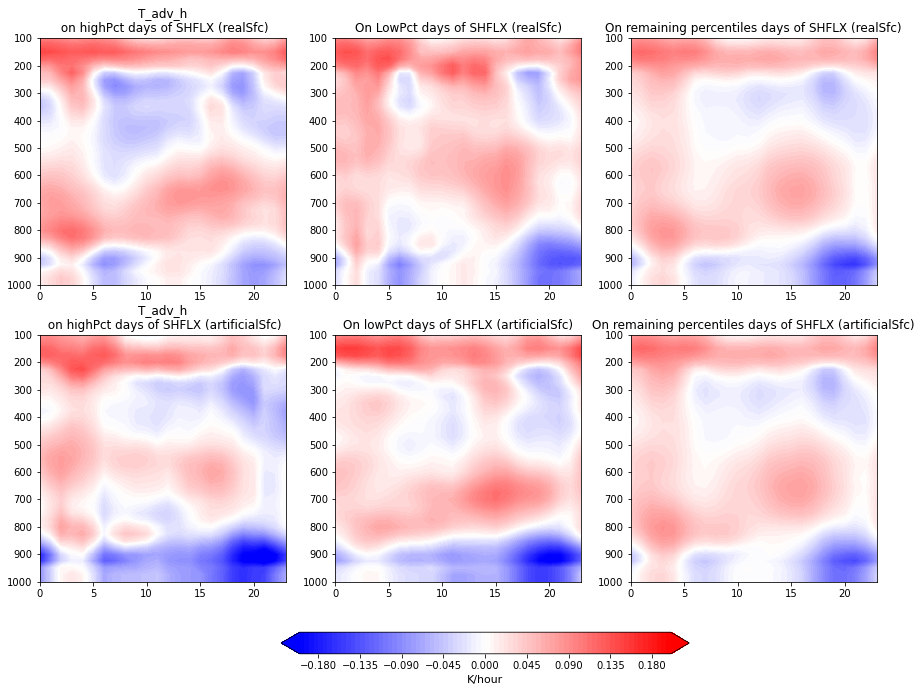

In [250]:
varSelPlot = 'T_adv_h'
levs = np.arange(-0.2, 0.205, 0.005)

fig,axs = plt.subplots(2,3, figsize=(15,10))
axs     = axs.ravel()

hours   = hourlyMean_highPct_realSfcHTG_obs['hour'].values
levAtm  =  hourlyMean_highPct_realSfcHTG_obs['lev'].values

axs[0].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_realSfcHTG_obs[varSelPlot].values), 
                levs, cmap='bwr', extend='both')
axs[1].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_realSfcHTG_obs[varSelPlot].values), 
                levs, cmap='bwr', extend='both')
axs[2].contourf(hours, levAtm, np.transpose(hourlyMean_restOfDays_realSfc_obs[varSelPlot].values), 
                levs, cmap='bwr', extend='both')


axs[3].contourf(hours, levAtm, np.transpose(hourlyMean_highPct_artSfcHTG_obs[varSelPlot].values), 
                     levs, cmap='bwr', extend='both')
cp = axs[4].contourf(hours, levAtm, np.transpose(hourlyMean_lowPct_artSfcHTG_obs[varSelPlot].values), 
                     levs, cmap='bwr', extend='both')
# Add colorbar
ax_position = axs[4].get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.05, ax_position.y0-0.1, ax_position.width+0.15, 0.03])
cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax)
cbar.set_label(nateDS_local[varSelPlot].units,fontsize=11)

axs[5].contourf(hours, levAtm, np.transpose(hourlyMean_restOfDays_artSfc_obs[varSelPlot].values), 
                     levs, cmap='bwr', extend='both')


# Invert axes and set up titles/labels
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[0].set_title(varSelPlot+'\n on highPct days of '+varSel+' (realSfc)')
axs[1].set_title('On LowPct days of '+varSel+' (realSfc)')
axs[2].set_title('On remaining percentiles days of '+varSel+' (realSfc)')

axs[3].set_title(varSelPlot+'\n on highPct days of '+varSel+' (artificialSfc)')
axs[4].set_title('On lowPct days of '+varSel+' (artificialSfc)')
axs[5].set_title('On remaining percentiles days of '+varSel+' (artificialSfc)')


**Should I be looking at the divergence as an anomaly from the mean background?**

In [251]:
def plot_daytime_profiles(highPctDS, lowPctDS, restOfDaysDS, HTGclassString, varSelPlot, startHr, endHr):
    
    
    if HTGclassString=='HTGreal':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    elif HTGclassString=='HTG*10':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    elif HTGclassString=='HTGart':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    elif HTGclassString=='HTG*0.5':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    elif HTGclassString=='HTG*0.25':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    else:
        print('Please select an existing HTGclassString')
    
    ## Get mean over selected hours 
    iHoursHigh   = np.where( (highPctDS["time.hour"].values>=startHr) & 
                             (highPctDS["time.hour"]<=endHr) )[0]
    selHoursHigh = highPctDS.isel(time=iHoursHigh)
    # Get mean over those hours 
    mean_selHoursHigh = selHoursHigh.groupby("year_month_day").mean(dim="time")


    iHoursLow   = np.where( (lowPctDS["time.hour"].values>=startHr) & 
                            (lowPctDS["time.hour"]<=endHr) )[0]
    selHoursLow = lowPctDS.isel(time=iHoursLow)
    # Get mean over those hours 
    mean_selHoursLow = selHoursLow.groupby("year_month_day").mean(dim="time")
    
    iHoursRest   = np.where( (restOfDaysDS["time.hour"].values>=startHr) & 
                             (restOfDaysDS["time.hour"]<=endHr) )[0]
    selHoursRest = restOfDaysDS.isel(time=iHoursLow)
    # Get mean over those hours 
    mean_selHoursRest = selHoursRest.groupby("year_month_day").mean(dim="time")
  
    
    ## Do the plotting 
    fig,axs = plt.subplots(1,1, figsize=(9,6))

    axs.axvline(0, color='grey')
#     axs[1].axvline(0, color='grey')

    for iDay in range(len(mean_selHoursHigh.year_month_day.values)):
        axs.plot(mean_selHoursHigh[varSelPlot].values[iDay,:], mean_selHoursHigh.lev.values, linewidth=1,
                    color=meanColor, alpha=0.2,label=None)

    axs.plot(np.nanmean(mean_selHoursHigh[varSelPlot].values, axis=0), mean_selHoursHigh.lev.values,color=meanColor, 
                linewidth=4,alpha=1.0, label='Mean highPct Days')    


    for iDay in range(len(mean_selHoursLow.year_month_day.values)):
        axs.plot(mean_selHoursLow[varSelPlot].values[iDay,:], mean_selHoursLow.lev.values, linewidth=1,
                    color=hmgColor, alpha=0.2,label=None)

    axs.plot(np.nanmean(mean_selHoursLow[varSelPlot].values, axis=0), mean_selHoursLow.lev.values, 
                color=hmgColor, linewidth=4,alpha=1.0, label='Mean lowPct Days')    

    # Add line for the rest of the days 
    axs.plot(np.nanmean(mean_selHoursRest[varSelPlot].values, axis=0), mean_selHoursRest.lev.values, 
                color='k', linewidth=4,alpha=0.7, label='Mean RestOf Days')   


    axs.legend()
    axs.invert_yaxis()
    axs.set_ylim([1000,400])
    axs.set_title(varSelPlot+': pct days (based on'+varSel+')\n ('+HTGclassString+')', fontsize=16)
    axs.set_xlabel(nateDS_local[varSelPlot].units, fontsize=12)


#     axs[1].legend()
#     axs[1].invert_yaxis()
#     axs[1].set_ylim([1000,400])
#     axs[1].set_title(varSelPlot+' lowPct days', fontsize=16)
#     axs[1].set_xlabel(nateDS_local[varSelPlot].units, fontsize=12)
    
    axs.grid()
#     axs[1].grid()

    print('Means computed over the hours (inclusive) of ', startHr,' to ', endHr)
    

In [252]:
startHr = 7
endHr   = 18 

Means computed over the hours (inclusive) of  7  to  18


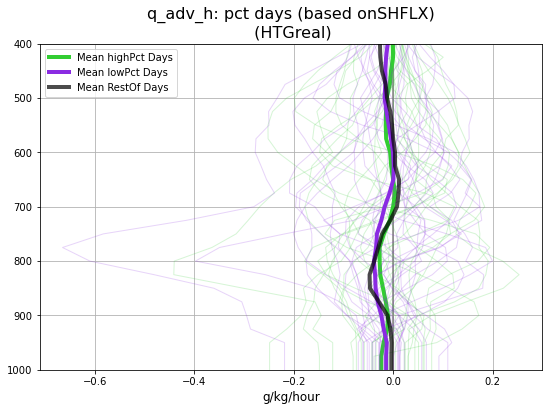

In [253]:
plot_daytime_profiles(highPct_realSfcHTG_obs, lowPct_realSfcHTG_obs, restOfDays_realSfc_obs, 'HTGreal',
                      'q_adv_h', startHr, endHr)

Means computed over the hours (inclusive) of  7  to  18


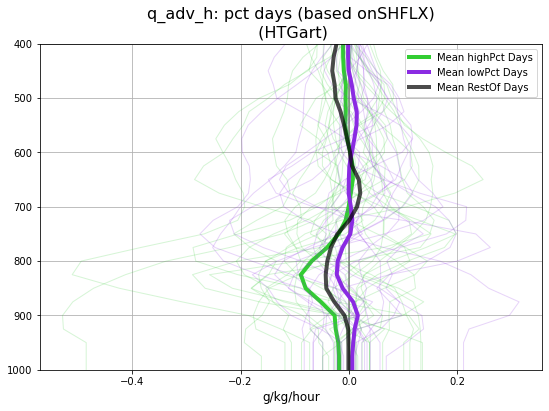

In [254]:
plot_daytime_profiles(highPct_artSfcHTG_obs, lowPct_artSfcHTG_obs, restOfDays_artSfc_obs, 'HTGart',
                      'q_adv_h', startHr, endHr)

Means computed over the hours (inclusive) of  7  to  18


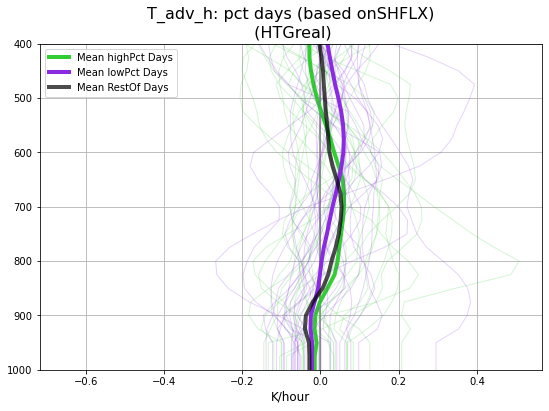

In [255]:
plot_daytime_profiles(highPct_realSfcHTG_obs, lowPct_realSfcHTG_obs, restOfDays_realSfc_obs, 'HTGreal',
                      'T_adv_h', startHr, endHr)

Means computed over the hours (inclusive) of  7  to  18


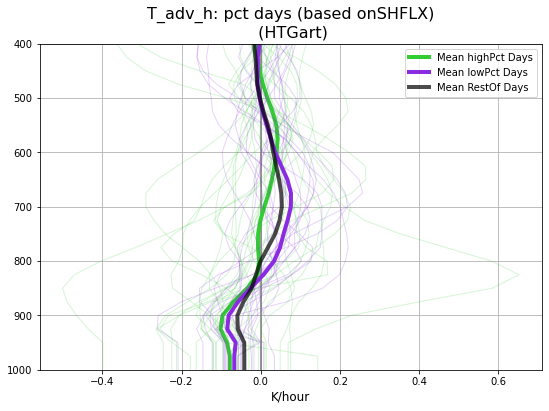

In [256]:
plot_daytime_profiles(highPct_artSfcHTG_obs, lowPct_artSfcHTG_obs, restOfDays_artSfc_obs, 'HTGart',
                      'T_adv_h', startHr, endHr)

Means computed over the hours (inclusive) of  7  to  18


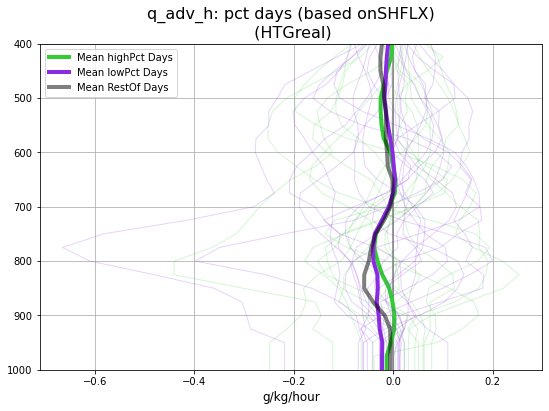

In [378]:
plot_daytime_profiles(highPct_realSfcHTG_obs, lowPct_realSfcHTG_obs, restOfDays_realSfc_obs, 'HTGreal',
                      'q_adv_h', startHr, endHr)

Means computed over the hours (inclusive) of  7  to  18


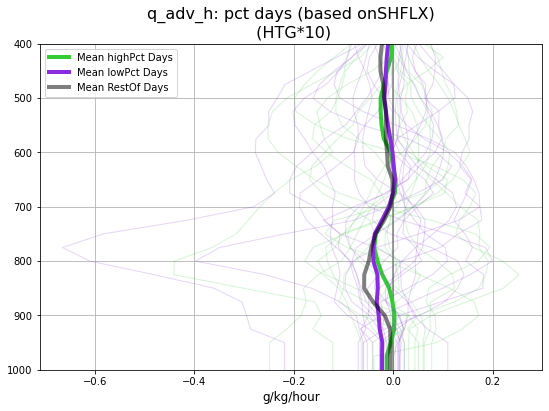

In [380]:
plot_daytime_profiles(highPct_realSfcHTG10_obs, lowPct_realSfcHTG10_obs, restOfDays_realSfc_obs, 'HTG*10',
                      'q_adv_h', startHr, endHr)

Means computed over the hours (inclusive) of  7  to  18


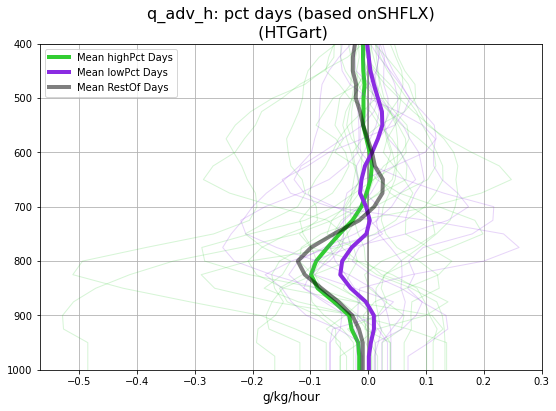

In [381]:
plot_daytime_profiles(highPct_artSfcHTG_obs, lowPct_artSfcHTG_obs, restOfDays_artSfc_obs, 'HTGart',
                      'q_adv_h', startHr, endHr)

Means computed over the hours (inclusive) of  7  to  18


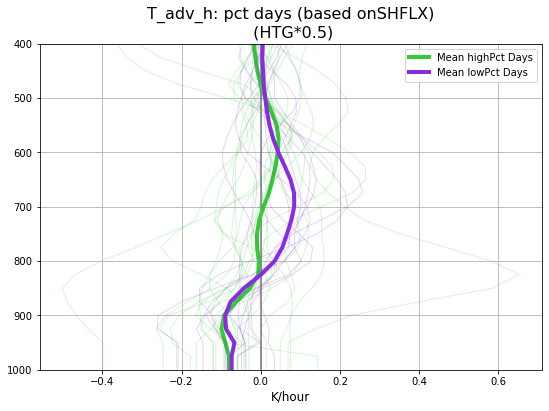

In [307]:
plot_daytime_profiles(highPct_artSfcHTG5_obs, lowPct_artSfcHTG5_obs, 'HTG*0.5',
                      'T_adv_h', startHr, endHr)

Means computed over the hours (inclusive) of  7  to  18


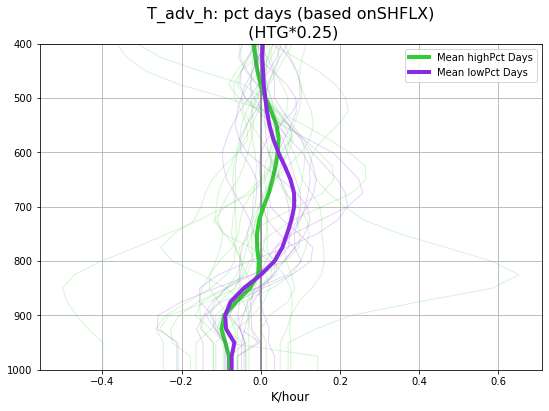

In [308]:
plot_daytime_profiles(highPct_artSfcHTG25_obs, lowPct_artSfcHTG25_obs, 'HTG*0.25',
                      'T_adv_h', startHr, endHr)

**Contour plots of other variable changes**

In [ ]:
def plot_daytime_profilesCAM(highPctDS, lowPctDS, restOfDaysDS, sfcString, varSelPlot, startHr, endHr):
    
    
    if sfcString=='realSfc':
        caseNames = 
    if sfcString=='artSfc':
        
    
    if HTGclassString=='HTGreal':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    elif HTGclassString=='HTG*10':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    elif HTGclassString=='HTGart':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    elif HTGclassString=='HTG*0.5':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    elif HTGclassString=='HTG*0.25':
        meanColor = 'limegreen'
        hmgColor  = 'blueviolet'
    else:
        print('Please select an existing HTGclassString')
    
    ## Get mean over selected hours 
    iHoursHigh   = np.where( (highPctDS["time.hour"].values>=startHr) & 
                             (highPctDS["time.hour"]<=endHr) )[0]
    selHoursHigh = highPctDS.isel(time=iHoursHigh)
    # Get mean over those hours 
    mean_selHoursHigh = selHoursHigh.groupby("year_month_day").mean(dim="time")


    iHoursLow   = np.where( (lowPctDS["time.hour"].values>=startHr) & 
                            (lowPctDS["time.hour"]<=endHr) )[0]
    selHoursLow = lowPctDS.isel(time=iHoursLow)
    # Get mean over those hours 
    mean_selHoursLow = selHoursLow.groupby("year_month_day").mean(dim="time")
    
    iHoursRest   = np.where( (restOfDaysDS["time.hour"].values>=startHr) & 
                             (restOfDaysDS["time.hour"]<=endHr) )[0]
    selHoursRest = restOfDaysDS.isel(time=iHoursLow)
    # Get mean over those hours 
    mean_selHoursRest = selHoursRest.groupby("year_month_day").mean(dim="time")
  
    
    ## Do the plotting 
    fig,axs = plt.subplots(1,1, figsize=(9,6))

    axs.axvline(0, color='grey')
#     axs[1].axvline(0, color='grey')

    for iDay in range(len(mean_selHoursHigh.year_month_day.values)):
        axs.plot(mean_selHoursHigh[varSelPlot].values[iDay,:], mean_selHoursHigh.lev.values, linewidth=1,
                    color=meanColor, alpha=0.2,label=None)

    axs.plot(np.nanmean(mean_selHoursHigh[varSelPlot].values, axis=0), mean_selHoursHigh.lev.values,color=meanColor, 
                linewidth=4,alpha=1.0, label='Mean highPct Days')    


    for iDay in range(len(mean_selHoursLow.year_month_day.values)):
        axs.plot(mean_selHoursLow[varSelPlot].values[iDay,:], mean_selHoursLow.lev.values, linewidth=1,
                    color=hmgColor, alpha=0.2,label=None)

    axs.plot(np.nanmean(mean_selHoursLow[varSelPlot].values, axis=0), mean_selHoursLow.lev.values, 
                color=hmgColor, linewidth=4,alpha=1.0, label='Mean lowPct Days')    

    # Add line for the rest of the days 
    axs.plot(np.nanmean(mean_selHoursRest[varSelPlot].values, axis=0), mean_selHoursRest.lev.values, 
                color='k', linewidth=4,alpha=0.7, label='Mean RestOf Days')   


    axs.legend()
    axs.invert_yaxis()
    axs.set_ylim([1000,400])
    axs.set_title(varSelPlot+': pct days (based on'+varSel+')\n ('+HTGclassString+')', fontsize=16)
    axs.set_xlabel(nateDS_local[varSelPlot].units, fontsize=12)


#     axs[1].legend()
#     axs[1].invert_yaxis()
#     axs[1].set_ylim([1000,400])
#     axs[1].set_title(varSelPlot+' lowPct days', fontsize=16)
#     axs[1].set_xlabel(nateDS_local[varSelPlot].units, fontsize=12)
    
    axs.grid()
#     axs[1].grid()

    print('Means computed over the hours (inclusive) of ', startHr,' to ', endHr)
    

In [261]:
np.shape(hourlyMean_highPct_realSfcHTG[varSelPlot].values)

(24, 2, 65, 1, 1)

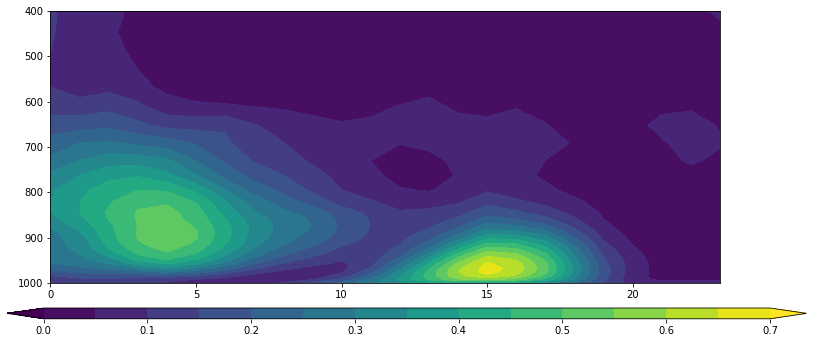

In [275]:
fig,axs = plt.subplots(1,1, figsize=(12,5))   

varSelPlot = 'WP2_CLUBB'

cp = axs.contourf(hourlyMean_highPct_realSfcHTG.hour.values, hourlyMean_highPct_realSfcHTG.ilev.values,
             np.transpose(hourlyMean_highPct_realSfcHTG[varSelPlot].values[:,0,:,0,0]),
             np.arange(0, 0.75, 0.05), extend='both')

# Add colorbar
ax_position = axs.get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.05, ax_position.y0-0.1, ax_position.width+0.15, 0.03])
cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax)
# cbar.set_label(nateDS_local[varSelPlot].units,fontsize=11)


axs.set_ylim([400,1000])
axs.invert_yaxis()
